In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import limpieza
import outliers
import analisis_bi_multi
import var_selection
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from scipy.stats import uniform, randint
from optbinning import OptimalBinning

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_path_train = r'D:\Documentos\projects\train_bank.csv'
file_path_test = r'D:\Documentos\projects\test_bank.csv'


df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

In [3]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [4]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [5]:
df_train= df_train.drop(columns=['id','CustomerId','Surname'])
df_test= df_test.drop(columns=['id','CustomerId','Surname'])

In [6]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [7]:
df_train[(df_train['Balance'] == 0) & (df_train['Exited'] == 0)].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,75156.000000,75156.000000,75156.000000,75156.0,75156.000000,75156.000000,75156.000000,75156.000000,75156.0
mean,656.984925,36.341002,5.070241,0.0,1.817899,0.766366,0.546224,111839.422702,0.0
std,78.539729,8.000223,2.778952,0.0,0.395635,0.423145,0.497862,50428.057738,0.0
min,350.000000,18.000000,0.000000,0.0,1.000000,0.000000,0.000000,90.070000,0.0
25%,599.000000,31.000000,3.000000,0.0,2.000000,1.000000,0.000000,74423.127500,0.0
50%,662.000000,35.000000,5.000000,0.0,2.000000,1.000000,1.000000,117431.100000,0.0
75%,710.000000,40.000000,7.000000,0.0,2.000000,1.000000,1.000000,153356.800000,0.0
max,850.000000,92.000000,10.000000,0.0,4.000000,1.000000,1.000000,199992.480000,0.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 13.9+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


In [10]:
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
df_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [12]:
def type(df,column,types):
    df[column]= df[column].astype(types)
    return

In [13]:
type(df_train,'Age','int64')
type(df_test,'Age','int64')

type(df_train,'HasCrCard','int64')
type(df_test,'HasCrCard','int64')

type(df_train,'IsActiveMember','int64')
type(df_test,'IsActiveMember','int64')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 13.9+ MB


In [15]:
limpieza.nan(df_train),limpieza.nan(df_test)

(CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 dtype: int64)

In [16]:
limpieza.shapiro(df_train), limpieza.ks(df_train)

D:\Anaconda\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


({'CreditScore': (0.9960258603096008, 0.0),
  'Age': (0.9505571722984314, 0.0),
  'Tenure': (0.9494650959968567, 0.0),
  'Balance': (0.7539149522781372, 0.0),
  'NumOfProducts': (0.6947762966156006, 0.0),
  'HasCrCard': (0.5352349877357483, 0.0),
  'IsActiveMember': (0.6358201503753662, 0.0),
  'EstimatedSalary': (0.967251718044281, 0.0),
  'Exited': (0.502591609954834, 0.0)},
 {'CreditScore': (1.0, 0.0),
  'Age': (1.0, 0.0),
  'Tenure': (0.8453558340951816, 0.0),
  'Balance': (0.5, 0.0),
  'NumOfProducts': (0.8413447460685429, 0.0),
  'HasCrCard': (0.5952984768149345, 0.0),
  'IsActiveMember': (0.5, 0.0),
  'EstimatedSalary': (1.0, 0.0),
  'Exited': (0.5, 0.0)})

In [17]:
limpieza.shapiro(df_test), limpieza.ks(df_test)

({'CreditScore': (0.9963492751121521, 2.588758782993667e-41),
  'Age': (0.9509072303771973, 0.0),
  'Tenure': (0.9500079154968262, 0.0),
  'Balance': (0.7530814409255981, 0.0),
  'NumOfProducts': (0.6914023160934448, 0.0),
  'HasCrCard': (0.536860466003418, 0.0),
  'IsActiveMember': (0.6375780701637268, 0.0),
  'EstimatedSalary': (0.9675146341323853, 0.0)},
 {'CreditScore': (1.0, 0.0),
  'Age': (1.0, 0.0),
  'Tenure': (0.8454501534466927, 0.0),
  'Balance': (0.5, 0.0),
  'NumOfProducts': (0.8413447460685429, 0.0),
  'HasCrCard': (0.5943872917180889, 0.0),
  'IsActiveMember': (0.5, 0.0),
  'EstimatedSalary': (1.0, 0.0)})

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

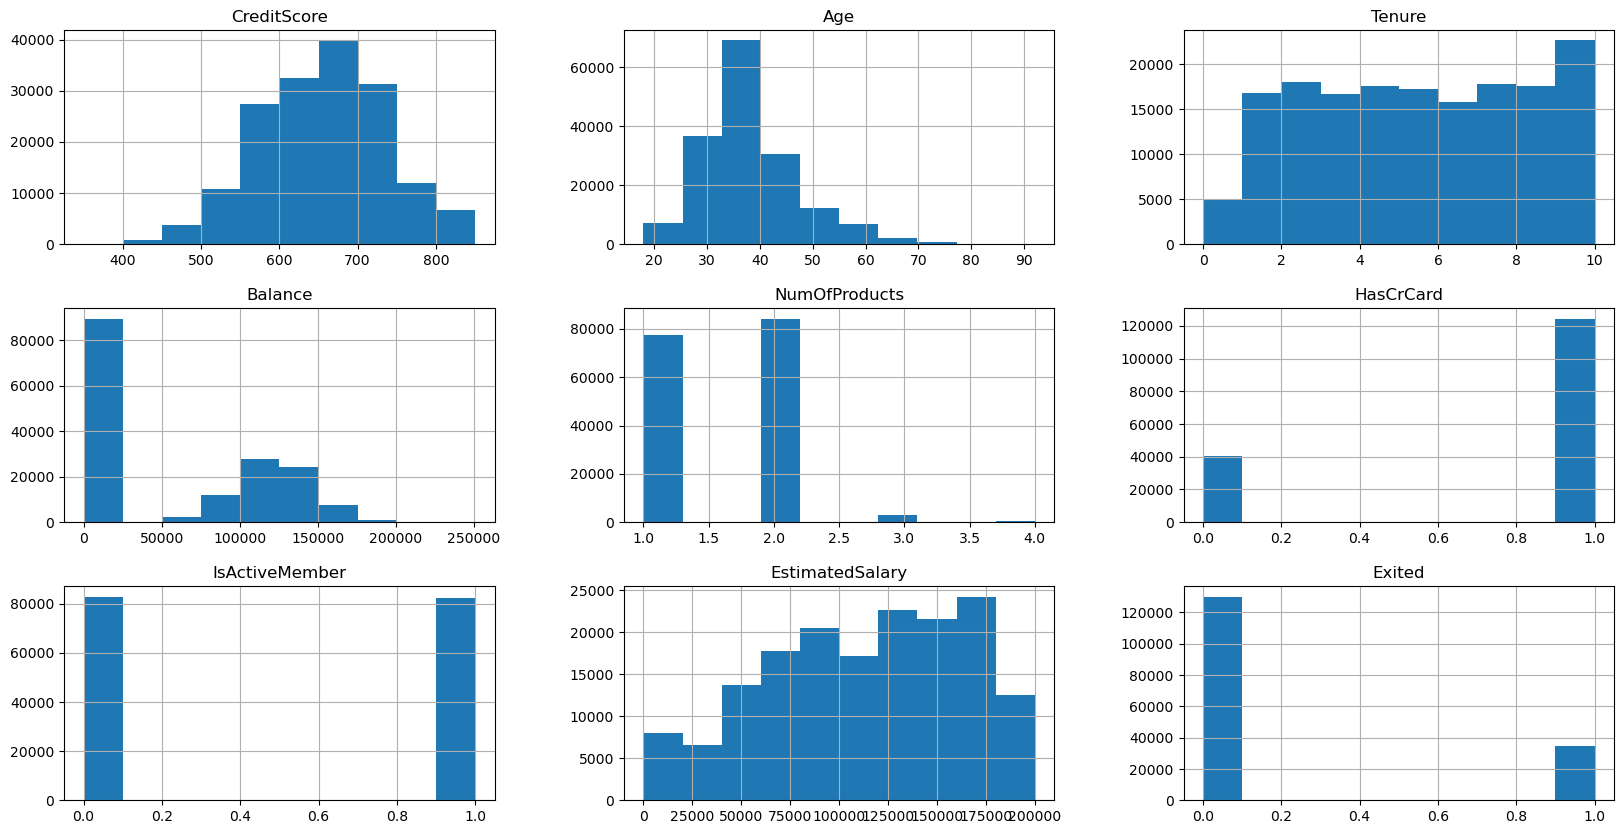

In [18]:
df_train.hist(figsize=(20,10))

In [19]:
df_train['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>, <Axes: >]],
      dtype=object)

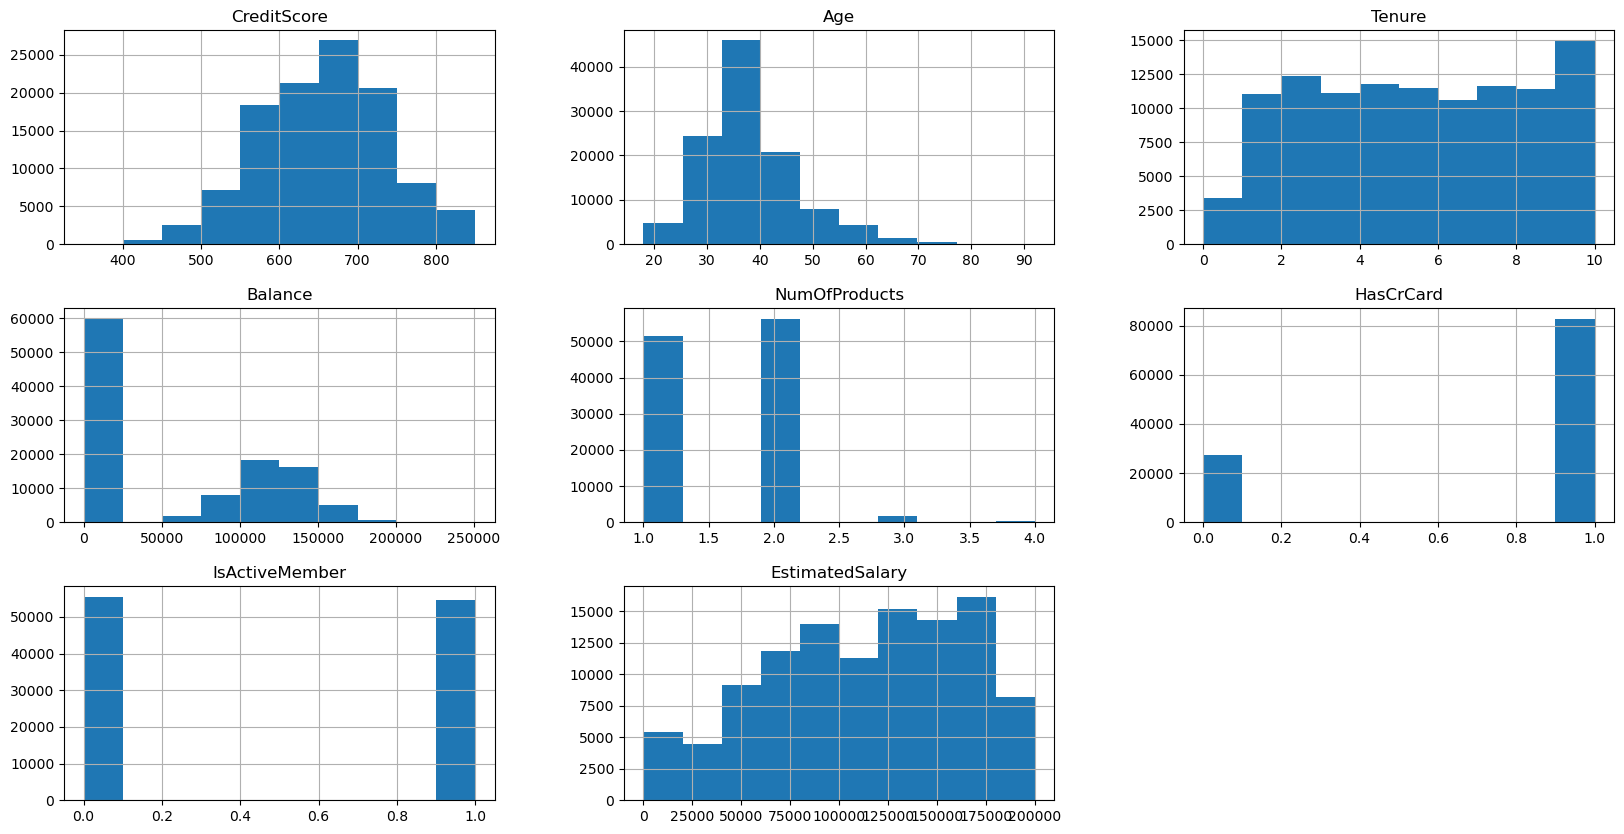

In [20]:
df_test.hist(figsize=(20,10))

<Axes: >

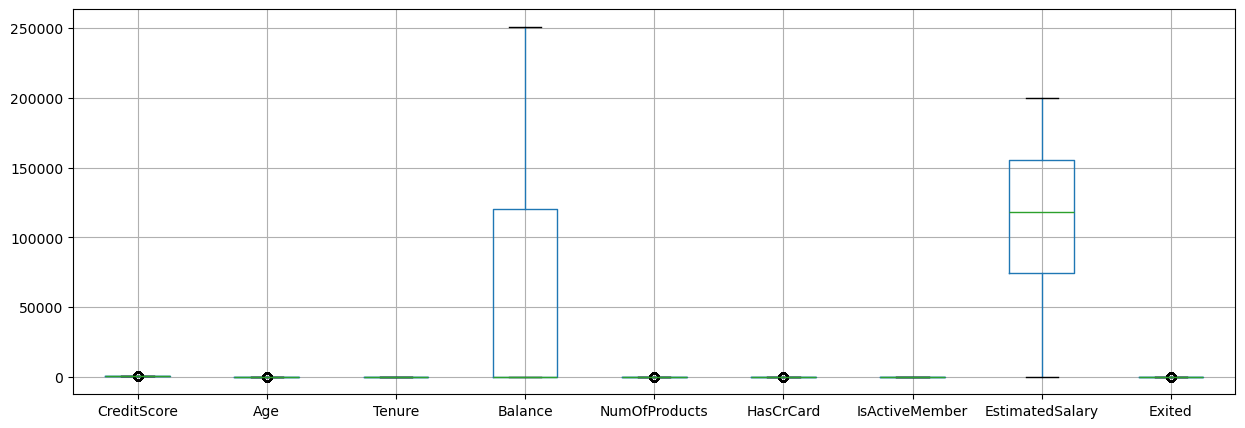

In [21]:
df_train.boxplot(figsize=(15,5))

<Axes: >

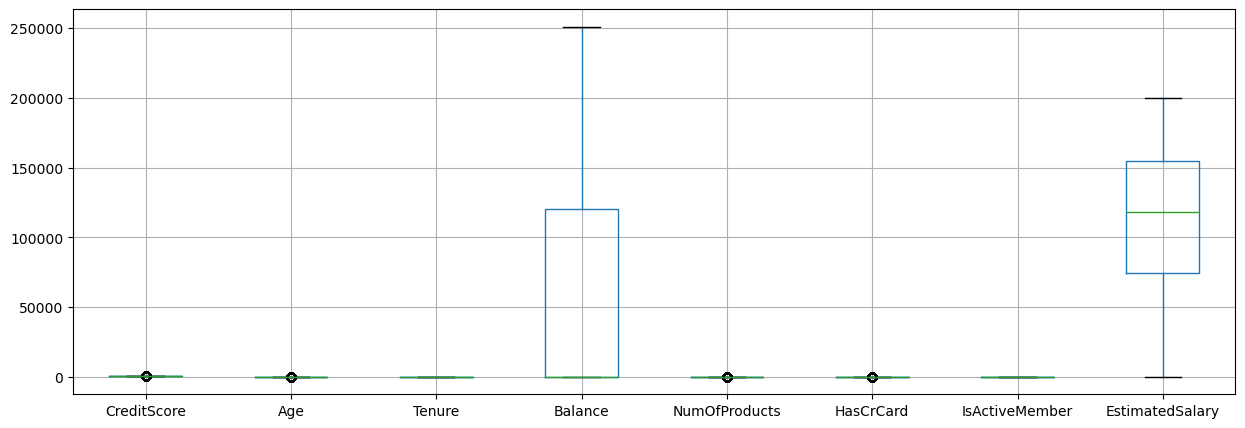

In [22]:
df_test.boxplot(figsize=(15,5))

In [23]:
def graf_func(df,column):
    column= df[column]
    plot = sns.JointGrid(data=df, x=column)
    plot.plot_joint(sns.histplot)
    plot.plot_marginals(sns.boxplot)
    return plot

(<seaborn.axisgrid.JointGrid at 0x25ac0c1be90>,
 <seaborn.axisgrid.JointGrid at 0x25ac486dfd0>)

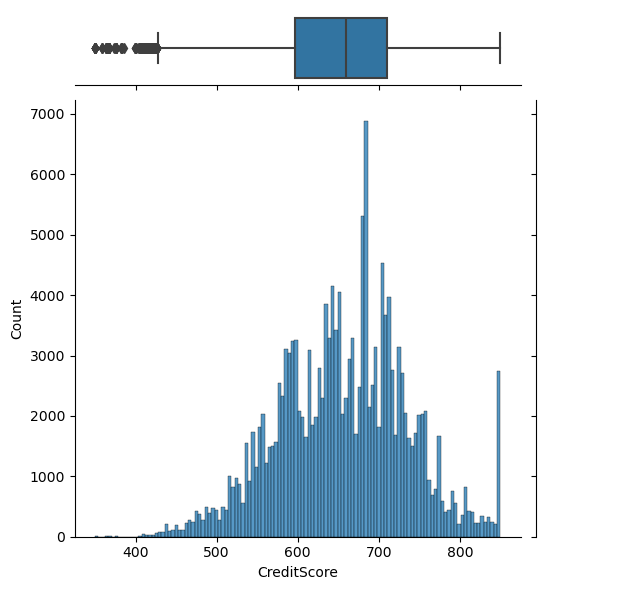

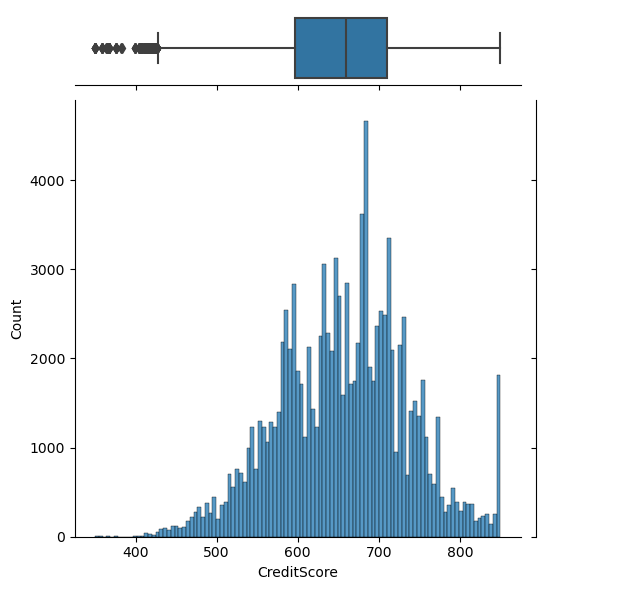

In [24]:
graf_func(df_train,'CreditScore'), graf_func(df_test,'CreditScore')

In [25]:
outliers.quantileoutlier(df_train,'CreditScore',1.5).max()

427

In [26]:
outliers.quantileoutlier(df_test,'CreditScore',1.5).max()

427

(<seaborn.axisgrid.JointGrid at 0x25ac7b36390>,
 <seaborn.axisgrid.JointGrid at 0x25ac389e910>)

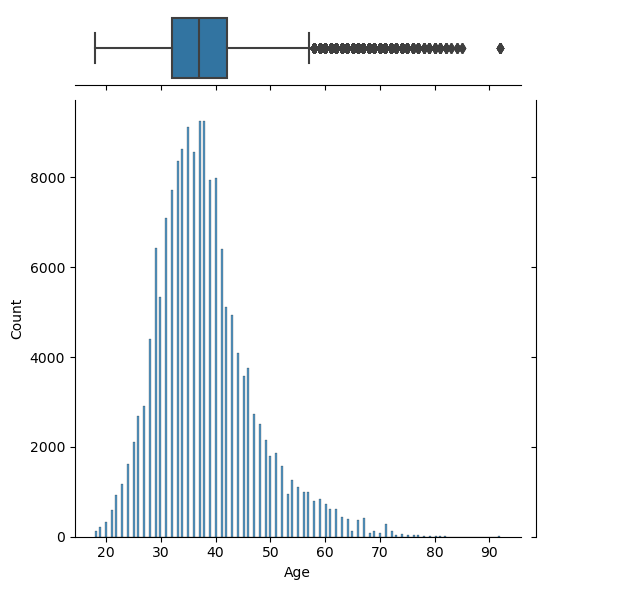

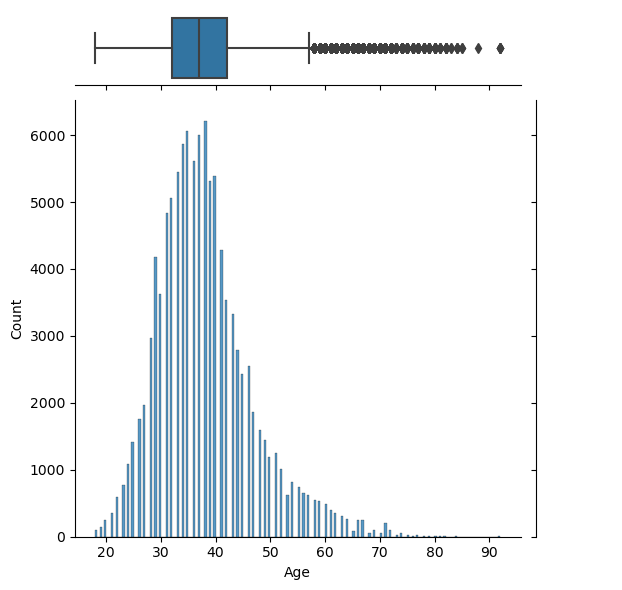

In [27]:
graf_func(df_train,'Age'), graf_func(df_test,'Age')

In [28]:
outliers.quantileoutlier(df_train,'Age',1.5).min()

58

In [29]:
outliers.quantileoutlier(df_test,'Age',1.5).min()

58

(<seaborn.axisgrid.JointGrid at 0x25ac629e390>,
 <seaborn.axisgrid.JointGrid at 0x25ac637e8d0>)

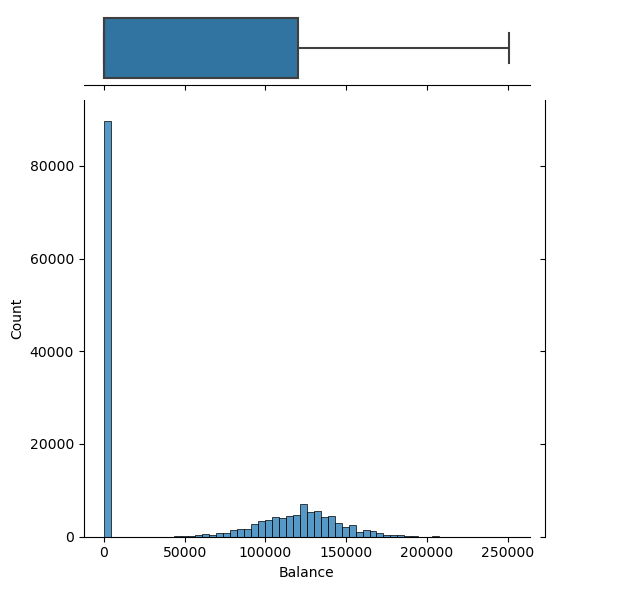

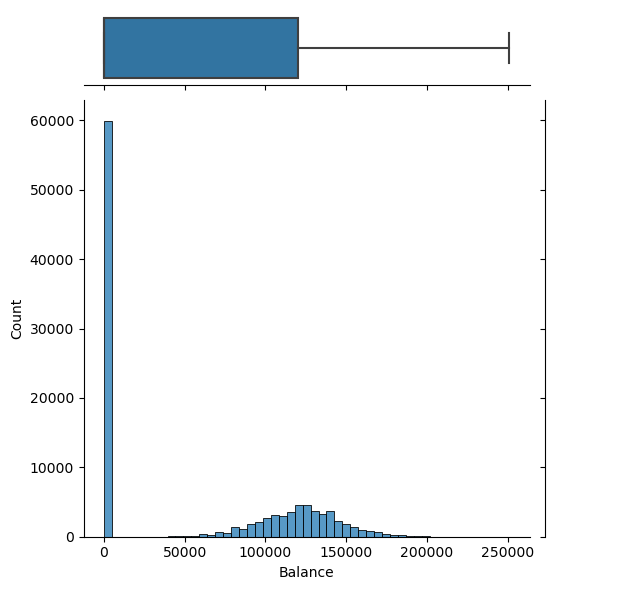

In [30]:
graf_func(df_train,'Balance'), graf_func(df_test,'Balance')

In [31]:
outliers.quantileoutlier(df_train,'Balance',1.5)

Series([], Name: Balance, dtype: float64)

In [32]:
outliers.quantileoutlier(df_test,'Balance',1.5)

Series([], Name: Balance, dtype: float64)

(<seaborn.axisgrid.JointGrid at 0x25ac764e390>,
 <seaborn.axisgrid.JointGrid at 0x25ac7ede8d0>)

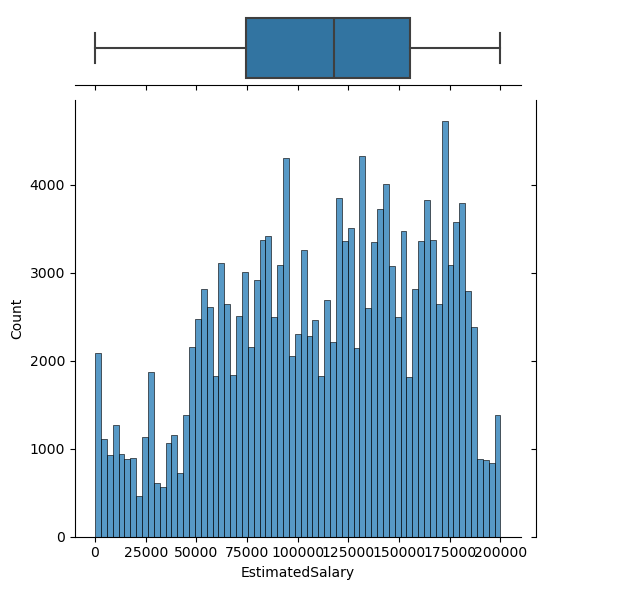

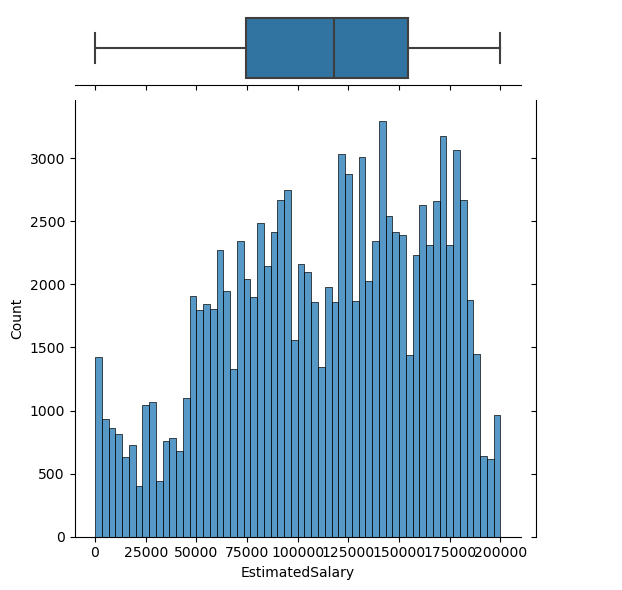

In [33]:
graf_func(df_train,'EstimatedSalary'), graf_func(df_test,'EstimatedSalary')

In [34]:
outliers.quantileoutlier(df_train,'EstimatedSalary',1.5)

Series([], Name: EstimatedSalary, dtype: float64)

In [35]:
outliers.quantileoutlier(df_test,'EstimatedSalary',1.5)

Series([], Name: EstimatedSalary, dtype: float64)

In [36]:
df_isolation= outliers.isolation(df_train,0.1)

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [37]:
df_isolation.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000
mean,656.318198,37.332451,5.038416,52660.068366,1.544961,0.795328,0.496385,113569.397607,0.154952
std,76.298493,7.991340,2.750676,61941.441021,0.503195,0.403463,0.499989,48915.728972,0.361860
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,599.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,76821.240000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,119333.300000,0.000000
75%,709.000000,41.000000,7.000000,117559.050000,2.000000,1.000000,1.000000,153955.380000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: >

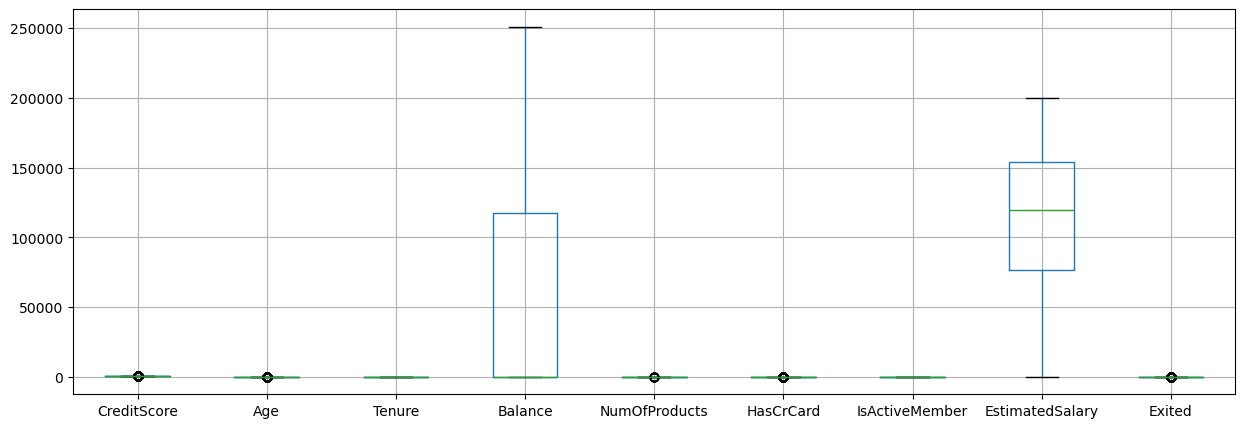

In [38]:
df_isolation.boxplot(figsize=(15,5))

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

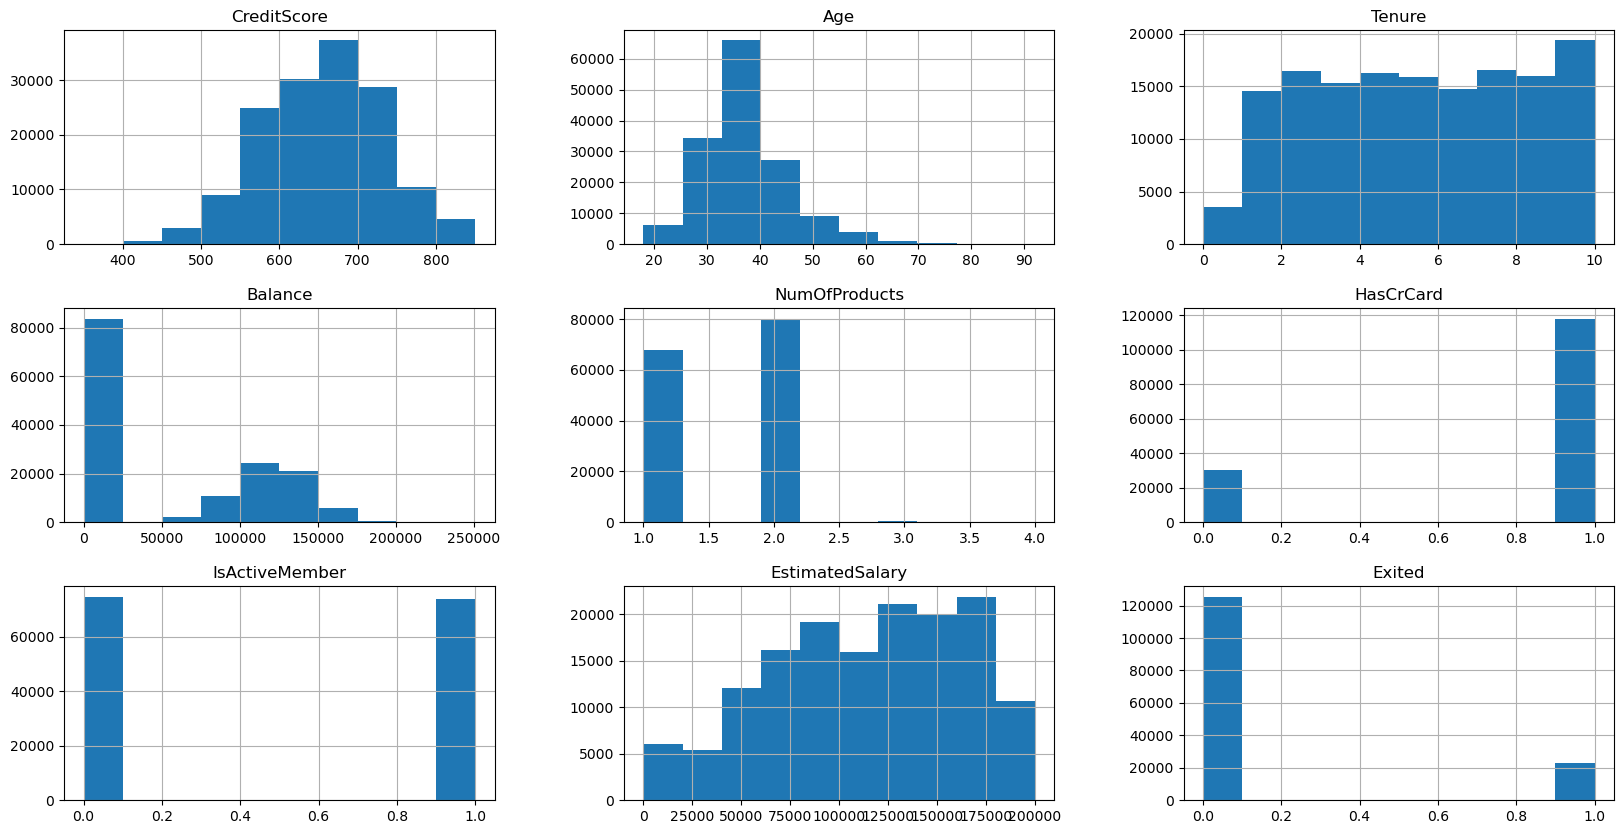

In [39]:
df_isolation.hist(figsize=(20,10))

In [40]:
df_knn= outliers.knn_outliers(df_train,0.1)

In [41]:
df_knn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,152370.000000,152370.000000,152370.000000,152370.000000,152370.000000,152370.00000,152370.000000,152370.000000,152370.000000
mean,656.360858,38.086894,5.021067,50093.694145,1.573105,0.75488,0.497545,113774.744753,0.208742
std,79.733850,8.843680,2.802904,61330.845002,0.544065,0.43016,0.499996,49426.267554,0.406411
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.00000,0.000000,76615.380000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.00000,0.000000,120107.100000,0.000000
75%,710.000000,42.000000,7.000000,117020.080000,2.000000,1.00000,1.000000,155853.955000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

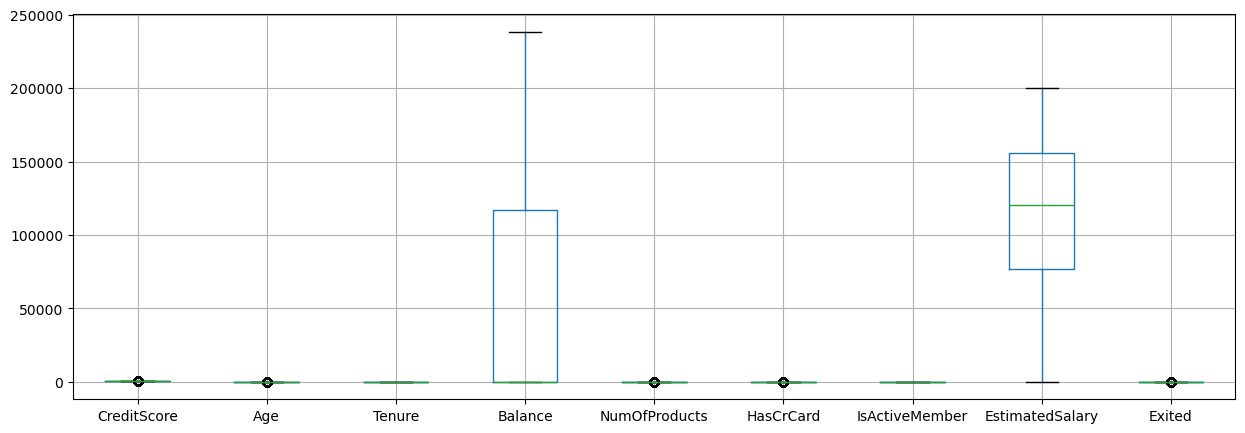

In [42]:
df_knn.boxplot(figsize=(15,5))

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

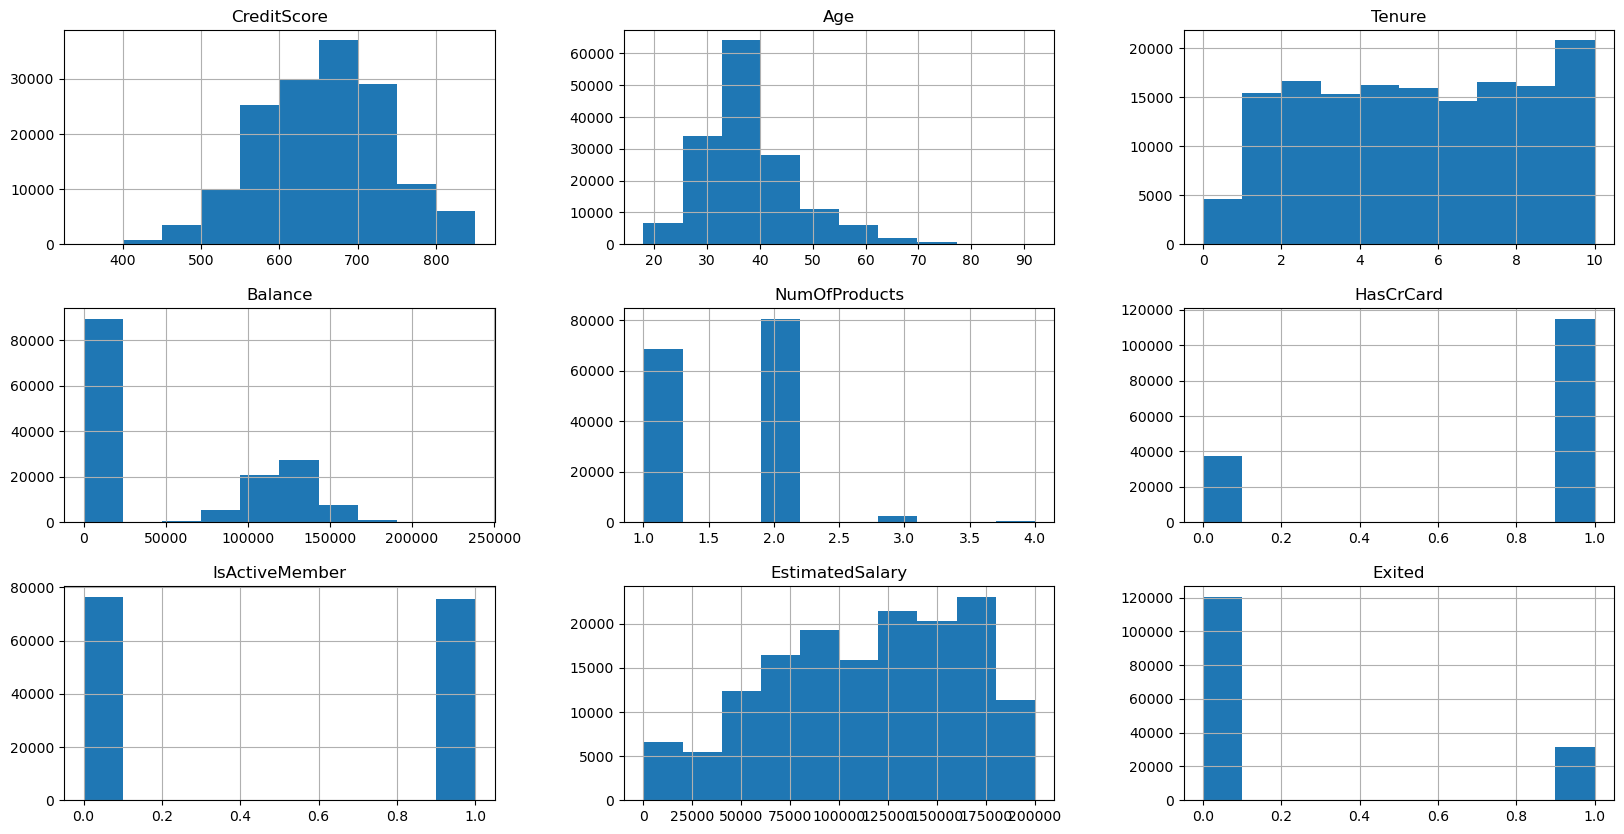

In [43]:
df_knn.hist(figsize=(20,10))

In [44]:
df_train= df_train[df_train['Age']<58].reset_index(drop=True)
df_test= df_test[df_test['Age']<58].reset_index(drop=True)

In [45]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
158635,667,Spain,Female,33,2,0.00,1,1,1,131834.75,0
158636,792,France,Male,35,3,0.00,1,0,0,131834.45,0
158637,565,France,Male,31,5,0.00,1,1,1,127429.56,0
158638,554,Spain,Female,30,7,161533.00,1,0,1,71173.03,0


In [46]:
df_train= df_train[df_train['CreditScore']>427].reset_index(drop=True)
df_test= df_test[df_test['CreditScore']>427].reset_index(drop=True)

In [47]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
158395,667,Spain,Female,33,2,0.00,1,1,1,131834.75,0
158396,792,France,Male,35,3,0.00,1,0,0,131834.45,0
158397,565,France,Male,31,5,0.00,1,1,1,127429.56,0
158398,554,Spain,Female,30,7,161533.00,1,0,1,71173.03,0


In [48]:
df_train['Exited'].value_counts(normalize=True)

Exited
0    0.79536
1    0.20464
Name: proportion, dtype: float64

<Axes: xlabel='Exited', ylabel='count'>

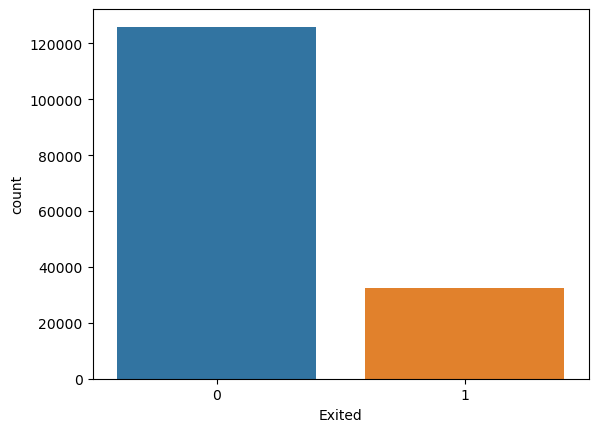

In [49]:
sns.countplot(x=df_train['Exited'])

[<Axes: ylabel='Geography'>, <Axes: ylabel='Gender'>]

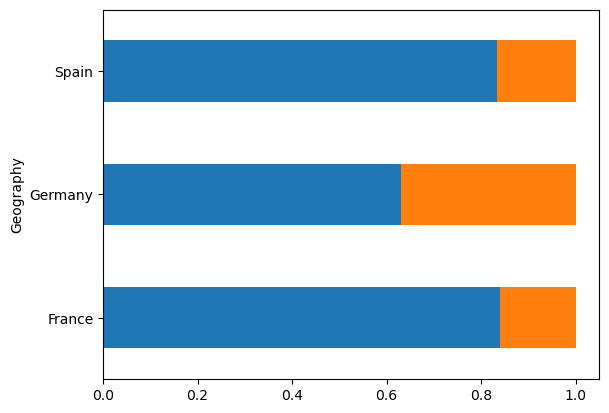

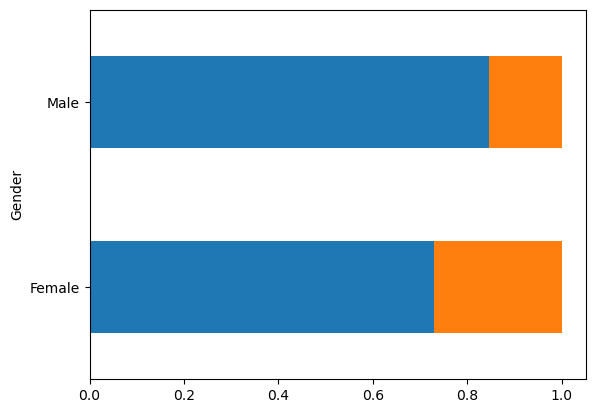

In [50]:
analisis_bi_multi.contingency(df_train,df_train['Exited'])

In [51]:
df_train['Geography'].value_counts()

Geography
France     90658
Spain      34721
Germany    33021
Name: count, dtype: int64

In [52]:
df_train['Gender'].value_counts()

Gender
Male      89662
Female    68738
Name: count, dtype: int64

In [53]:
df_train= limpieza.categorize(df_train)
df_test= limpieza.categorize(df_test)

In [54]:
df_train['Geography'].value_counts()

Geography
0    90658
1    34721
2    33021
Name: count, dtype: int64

In [55]:
df_train['Gender'].value_counts()

Gender
0    89662
1    68738
Name: count, dtype: int64

In [56]:
df_train['NumOfProducts'].value_counts()

NumOfProducts
2    81619
1    73674
3     2673
4      434
Name: count, dtype: int64

<Axes: xlabel='Gender'>

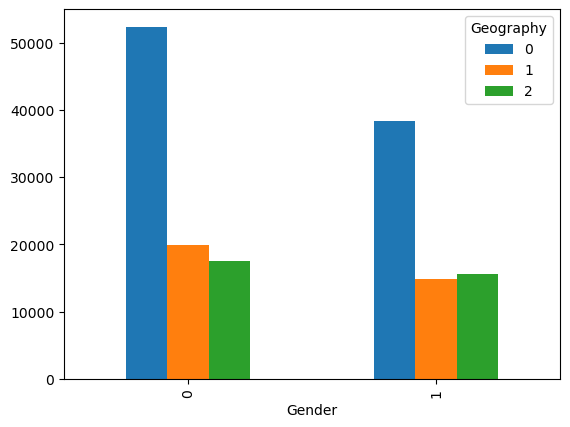

In [57]:
df_train.groupby(['Gender','Geography']).size().unstack().plot(kind='bar',stacked=False)

<Axes: xlabel='Gender', ylabel='Exited'>

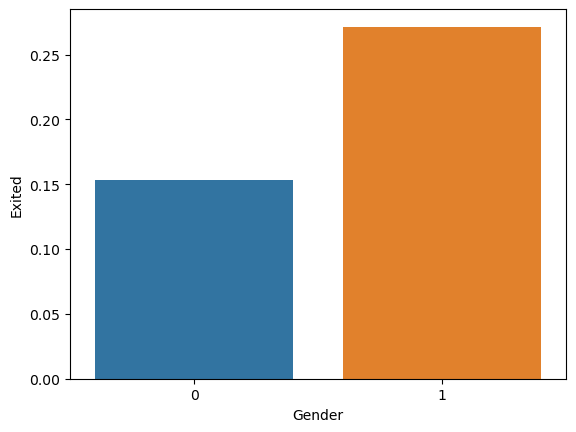

In [58]:
sns.barplot(x="Gender", y="Exited", data=df_train, ci=None)

<Axes: xlabel='Exited'>

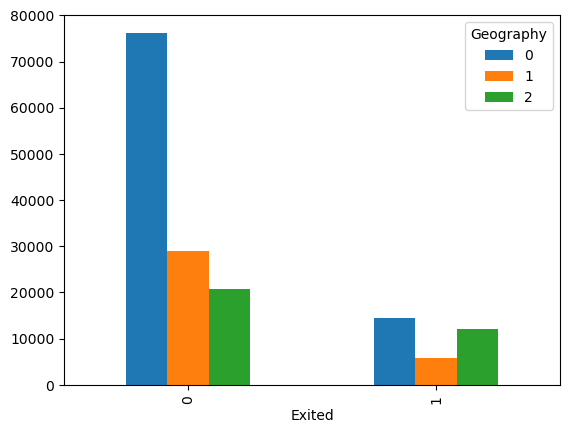

In [59]:
df_train.groupby(['Exited','Geography']).size().unstack().plot(kind='bar',stacked=False)

<Axes: xlabel='Geography', ylabel='Exited'>

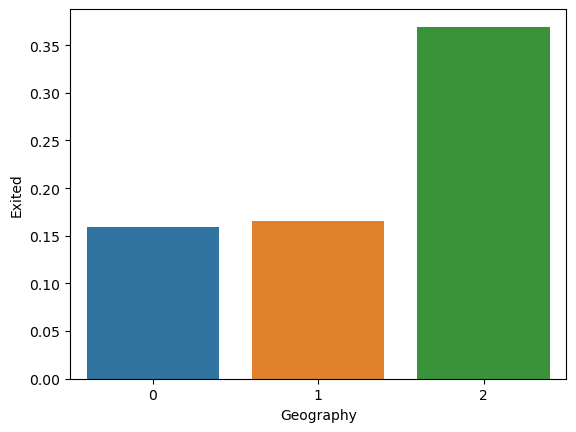

In [60]:
sns.barplot(x="Geography", y="Exited", data=df_train, ci=None)

<Axes: xlabel='Exited'>

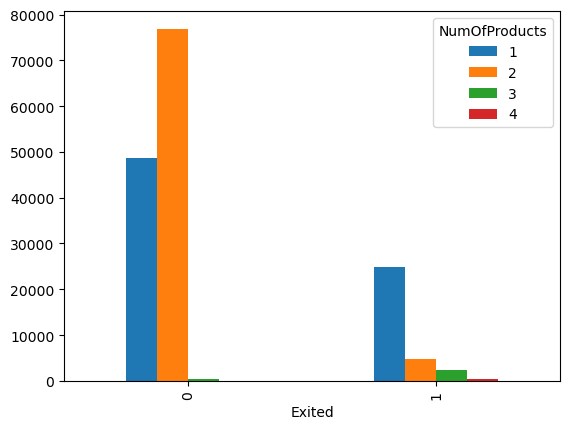

In [61]:
df_train.groupby(['Exited','NumOfProducts']).size().unstack().plot(kind='bar',stacked=False)

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

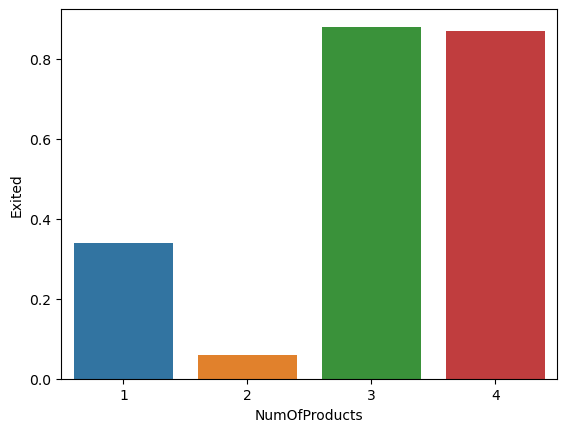

In [62]:
sns.barplot(x="NumOfProducts", y="Exited", data=df_train, ci=None)

<Axes: xlabel='Exited'>

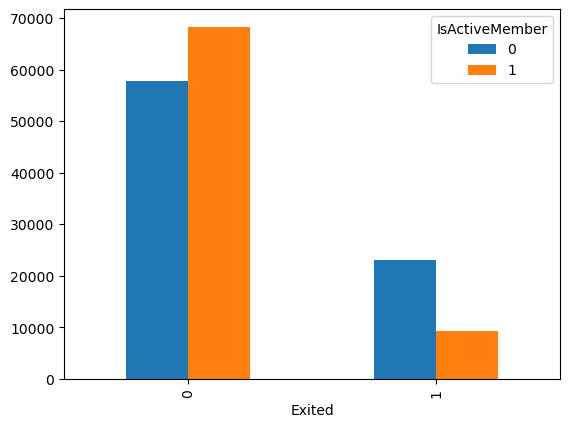

In [63]:
df_train.groupby(['Exited','IsActiveMember']).size().unstack().plot(kind='bar',stacked=False)

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

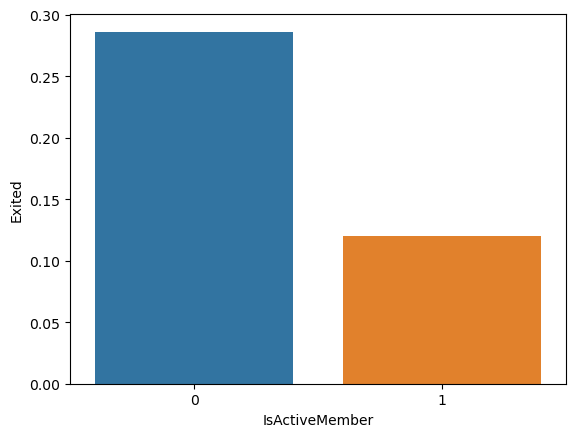

In [64]:
sns.barplot(x="IsActiveMember", y="Exited", data=df_train, ci=None)

In [65]:
X= df_train.drop(columns=['Exited']).astype('int64')
X = sm.add_constant(X)  # Añadir una columna de unos para el intercepto si es necesario
y = df_train['Exited']

# Crear términos de interacción entre 'region' y 'gender'
X['region_gender_interaction'] = X['Geography'] * X['Gender']

# Ajustar el modelo lineal con términos de interacción
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     4464.
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:45:26   Log-Likelihood:                -59589.
No. Observations:              158400   AIC:                         1.192e+05
Df Residuals:                  158388   BIC:                         1.193e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

AttributeError: 'int' object has no attribute 'startswith'

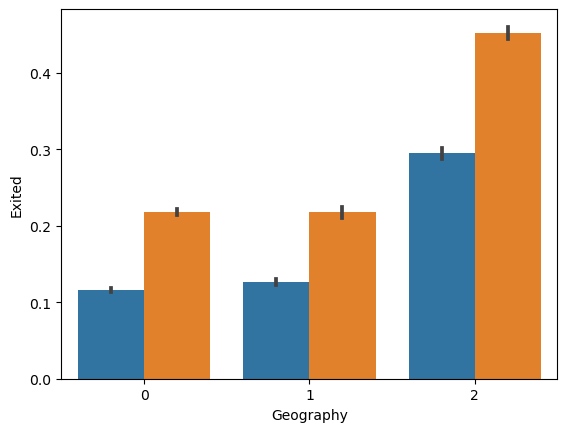

In [66]:
sns.barplot(x='Geography', y='Exited', hue='Gender', data=df_train)

In [67]:
from scipy.stats import chi2_contingency

In [68]:
contingency_table= pd.crosstab([df_train['Geography'],df_train['Gender']],df_train['Exited'])

chi,p,dof,expected= chi2_contingency(contingency_table)
print(chi, p)

10073.835087854186 0.0


In [69]:
contingency_table= pd.crosstab([df_train['Gender']],df_train['Exited'])

chi,p,dof,expected= chi2_contingency(contingency_table)
print(chi, p)

3326.6749273943005 0.0


In [70]:
contingency_table= pd.crosstab([df_train['Geography']],df_train['Exited'])

chi,p,dof,expected= chi2_contingency(contingency_table)
print(chi, p)

6964.4687912122845 0.0


<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

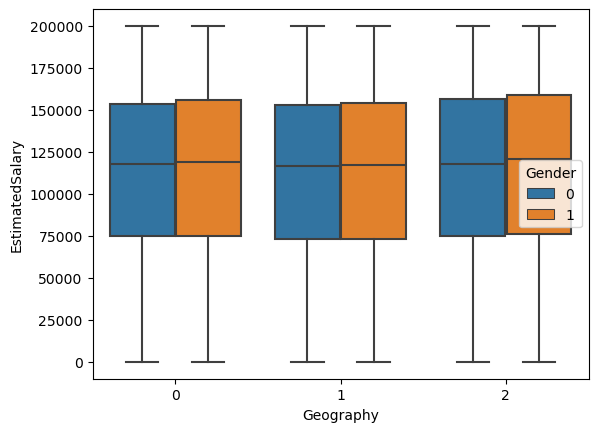

In [71]:
sns.boxplot(x='Geography',y='EstimatedSalary',hue='Gender', data=df_train)

<Axes: xlabel='Geography', ylabel='Balance'>

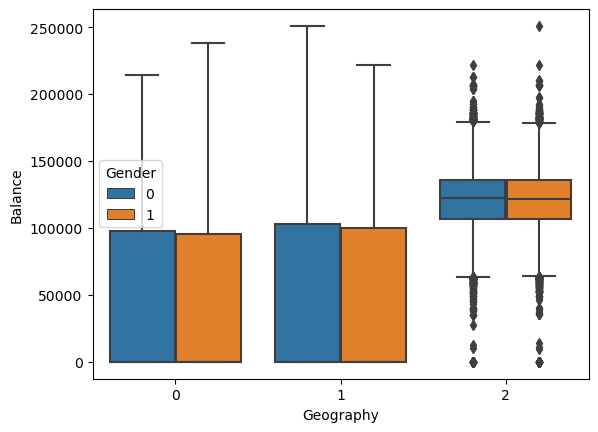

In [72]:
sns.boxplot(x='Geography',y='Balance',hue='Gender', data=df_train)

<Axes: xlabel='Geography', ylabel='NumOfProducts'>

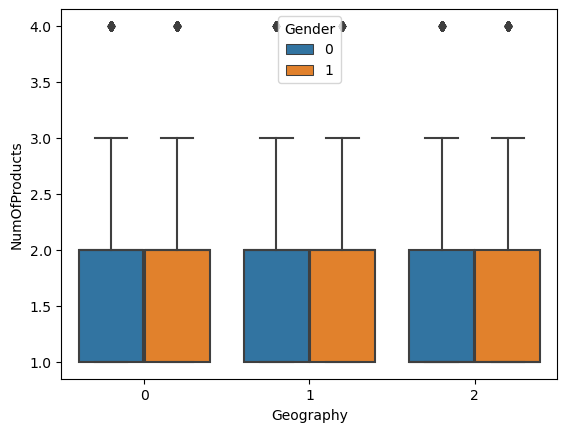

In [73]:
sns.boxplot(x='Geography',y='NumOfProducts',hue='Gender', data=df_train)

<Axes: xlabel='Geography', ylabel='Tenure'>

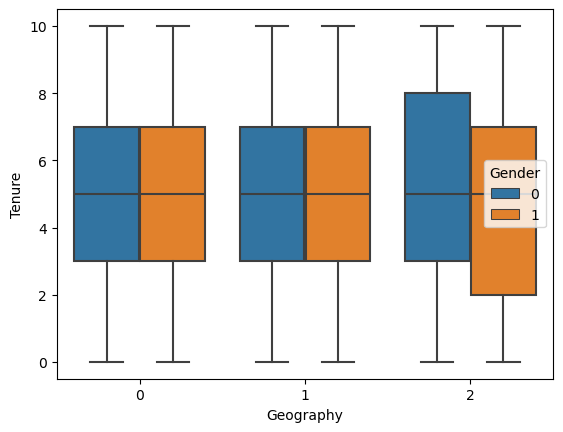

In [74]:
sns.boxplot(x='Geography',y='Tenure',hue='Gender', data=df_train)

## Variable Selection con todo el DataFrame

<Axes: >

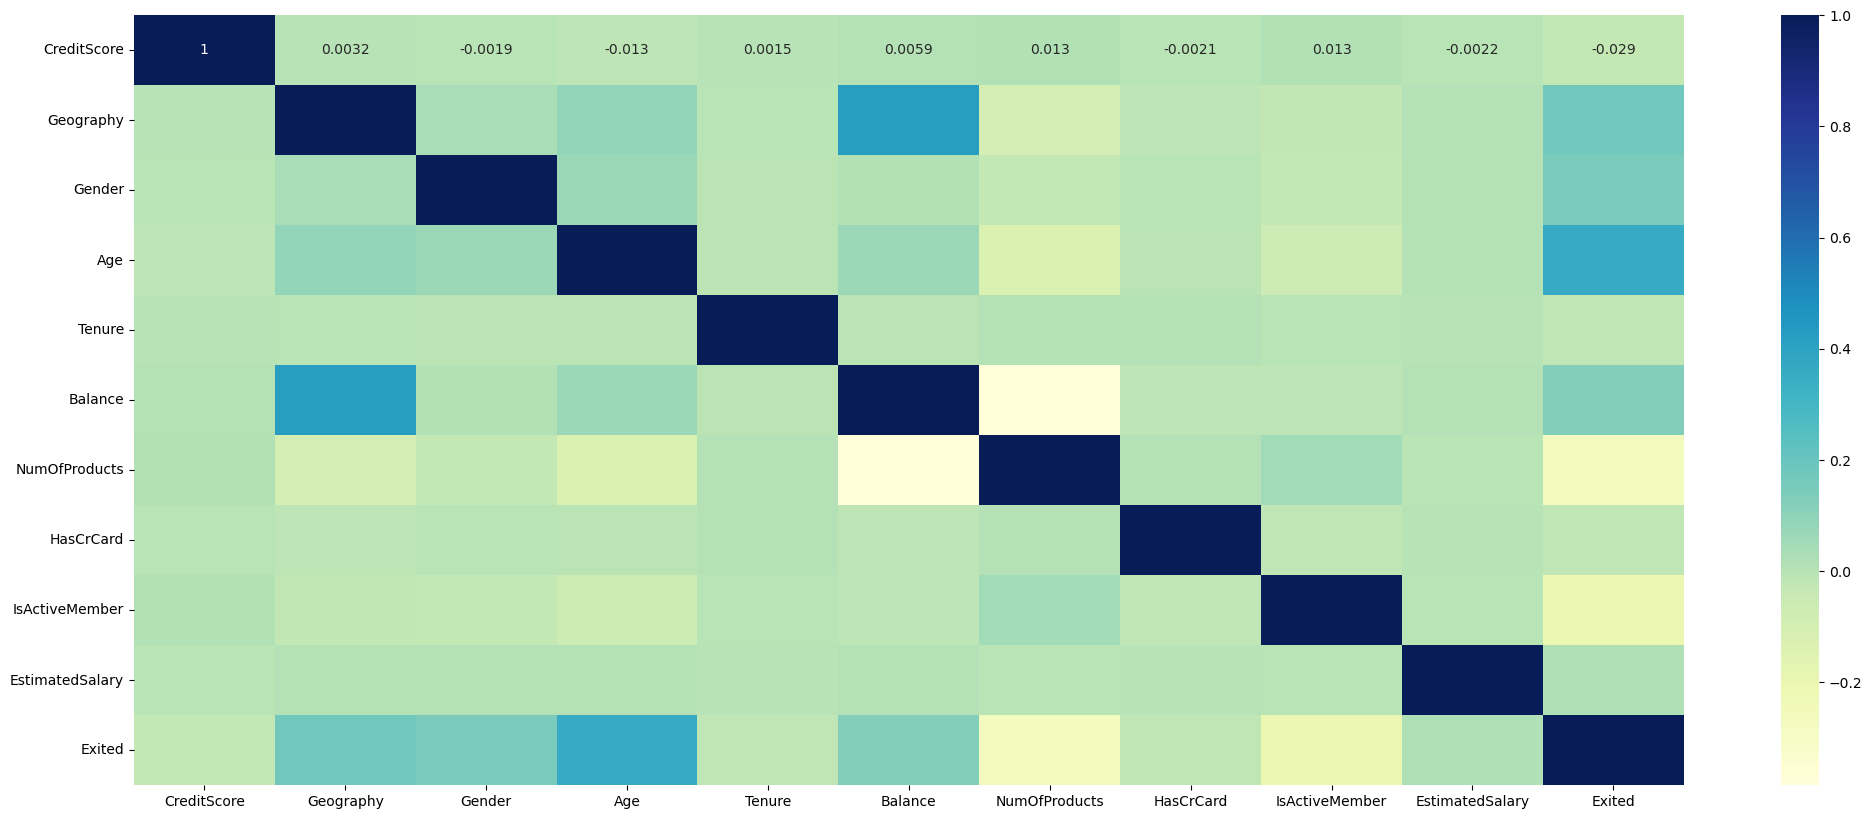

In [75]:
correlation= df_train.astype('int64').corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')

In [76]:
analisis_bi_multi.correlation(df_train,'Exited')

,Correlation,P-Value
CreditScore,-0.028786,2.123955e-30
Geography,0.169558,0.000000e+00
Gender,0.144936,0.000000e+00
Age,0.358363,0.000000e+00
Tenure,-0.018776,7.822586e-14
Balance,0.125292,0.000000e+00
NumOfProducts,-0.265255,0.000000e+00
HasCrCard,-0.021961,2.304875e-18
IsActiveMember,-0.206161,0.000000e+00
EstimatedSalary,0.019803,3.219586e-15


In [77]:
analisis_bi_multi.olstest(df_train,'Exited')

{'CreditScore': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                      P>F  df constraint  df denom
 const    [[1221.49789153734]]  1.3564678311196269e-266              1  158398.0
 x      [[116.23463821088713]]    4.315160289737931e-27              1  158398.0,
 'Geography': <class 'statsmodels.stats.contrast.WaldTestResults'>
                            F  P>F  df constraint  df denom
 const  [[13147.80349315168]]  0.0              1  158398.0
 x      [[5636.621761107505]]  0.0              1  158398.0,
 'Gender': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[13248.365497430186]]  0.0              1  158398.0
 x      [[3398.7529927403843]]  0.0              1  158398.0,
 'Age': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[13813.161317156811]]  0.0              1  158398.0
 x      

In [78]:
analisis_bi_multi.varclus(df_train)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Geography,0.738246,0.029628,2.697458e-01
1,0,Balance,0.738246,0.133781,3.021796e-01
2,1,Age,0.689635,0.012621,3.143319e-01
3,1,Exited,0.689635,0.046081,3.253576e-01
4,2,EstimatedSalary,1.000000,0.000203,0.000000e+00
5,3,CreditScore,1.000000,0.000552,0.000000e+00
6,4,HasCrCard,1.000000,0.000452,0.000000e+00
7,5,Tenure,1.000000,0.000292,0.000000e+00
8,6,IsActiveMember,1.000000,0.025176,0.000000e+00
9,7,Gender,1.000000,0.016499,0.000000e+00


In [79]:
corr= stats.spearmanr(df_train[['Exited','Geography','Balance']])
corr[0][0]

array([1.        , 0.16955767, 0.12529184])

In [80]:
type(df_train,'Tenure','int64')

In [81]:
analisis_bi_multi.woenum(df_train,df_train['Exited'])

{'CreditScore':                      Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 560.50)   18611   0.117494      14195   4416    0.237279   
 1       [560.50, 659.50)   60571   0.382393      47629  12942    0.213667   
 2       [659.50, 709.50)   38740   0.244571      31593   7147    0.184486   
 3       [709.50, 730.50)   14101   0.089021      11602   2499    0.177221   
 4          [730.50, inf)   26377   0.166521      20966   5411    0.205141   
 5                Special       0   0.000000          0      0    0.000000   
 6                Missing       0   0.000000          0      0    0.000000   
 Totals                    158400   1.000000     125985  32415    0.204640   
 
              WoE        IV            JS  
 0      -0.189886  0.004474  5.584016e-04  
 1      -0.054578  0.001157  1.446581e-04  
 2       0.128701  0.003898  4.868565e-04  
 3       0.177745  0.002666  3.327543e-04  
 4      -0.003073  0.000002  1.967960e-07  
 5            0.0

In [82]:
analisis_bi_multi.woecat(df_train,df_train['Exited'])

{'Geography':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   90658   0.572336      76204  14454    0.159434  0.304901   
 1           [1]   34721   0.219198      28958   5763    0.165980  0.256847   
 2           [2]   33021   0.208466      20823  12198    0.369401 -0.822755   
 3       Special       0   0.000000          0      0    0.000000       0.0   
 4       Missing       0   0.000000          0      0    0.000000       0.0   
 Totals           158400   1.000000     125985  32415    0.204640             
 
               IV        JS  
 0       0.048467  0.006035  
 1       0.013373  0.001667  
 2       0.173623  0.021111  
 3       0.000000  0.000000  
 4       0.000000  0.000000  
 Totals  0.235463  0.028813  ,
 'Gender':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   89662   0.566048      75904  13758    0.153443  0.350307   
 1           [1]   68738   0.433952      50081  18657

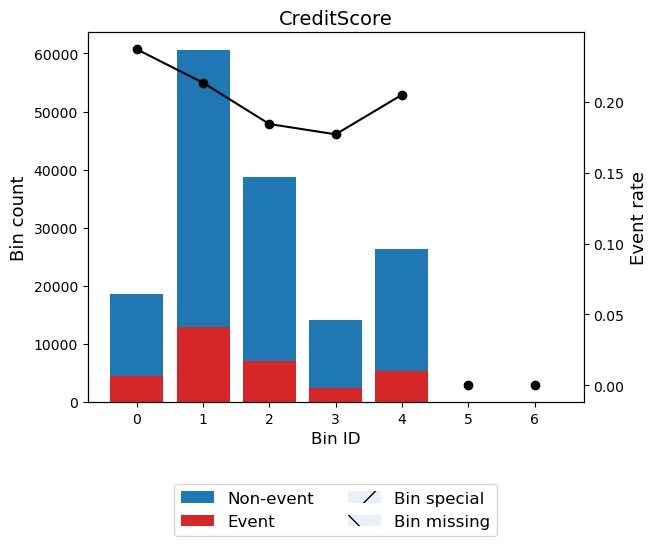

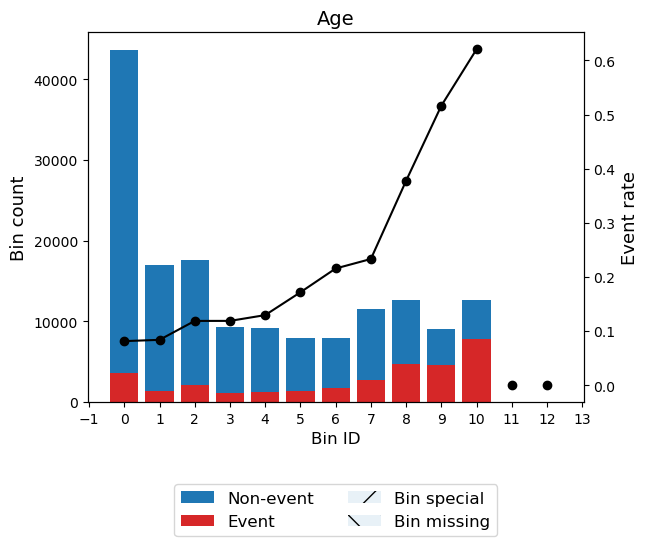

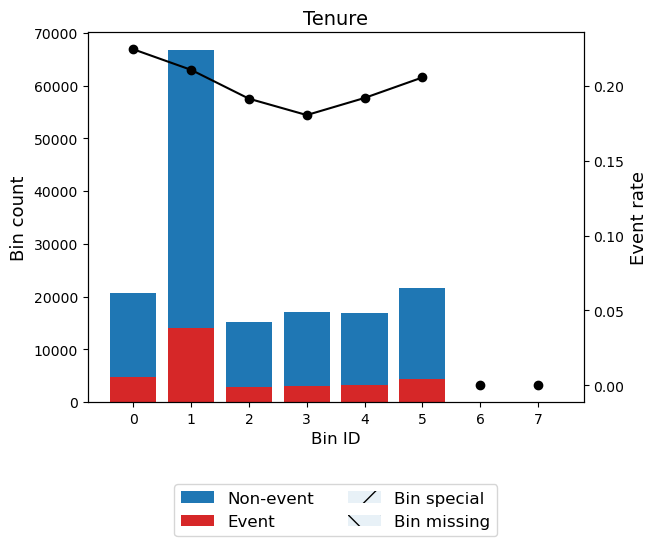

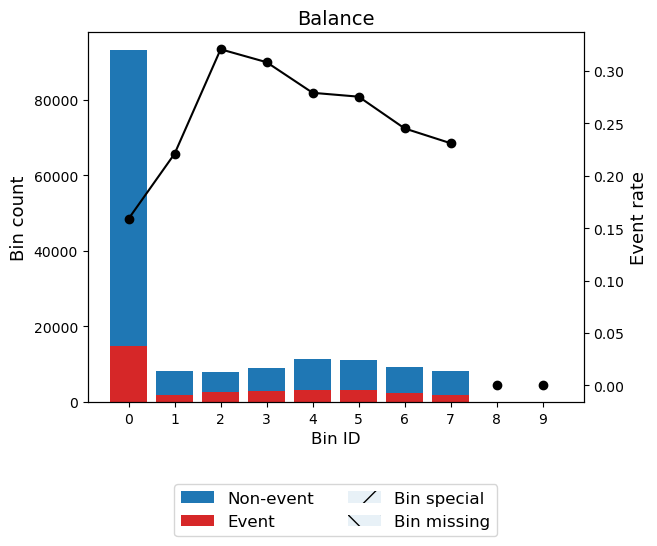

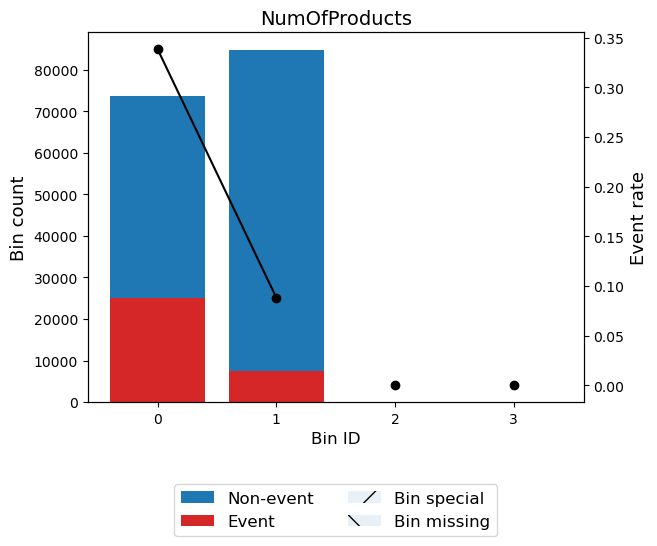

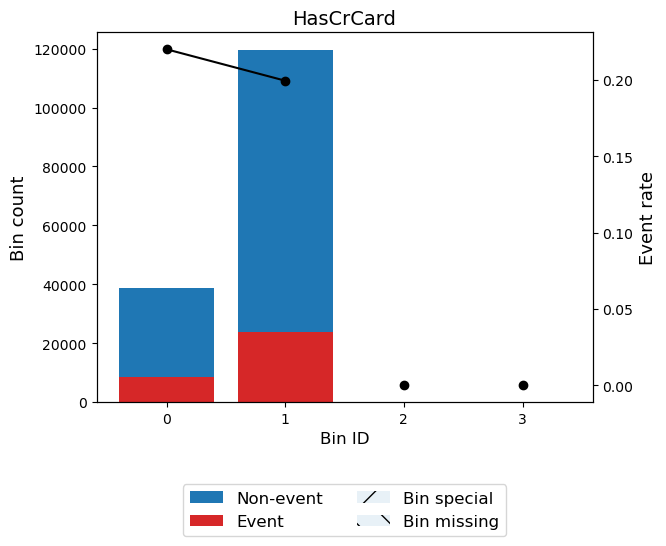

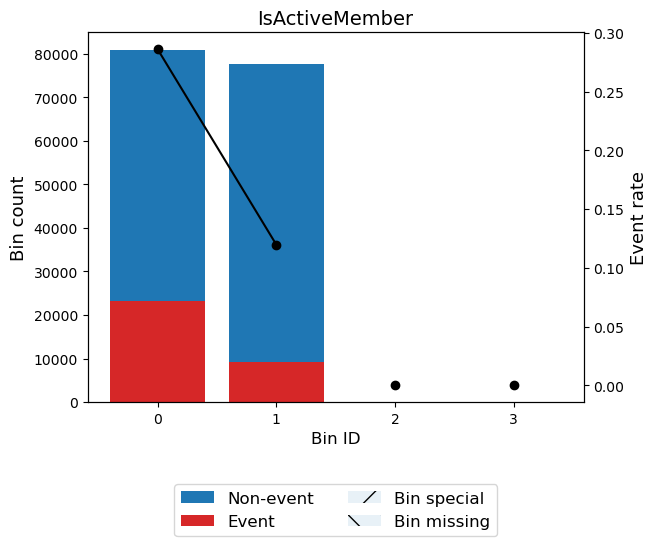

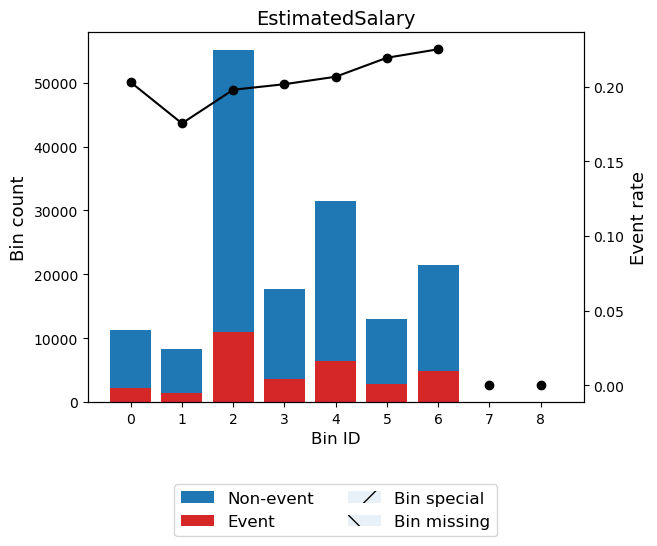

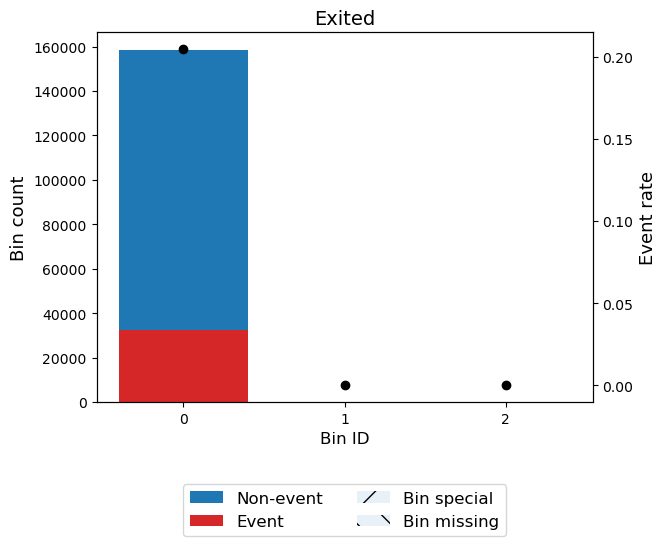

[None, None, None, None, None, None, None, None, None]

In [83]:
analisis_bi_multi.woegrafnum(df_train,df_train['Exited'])

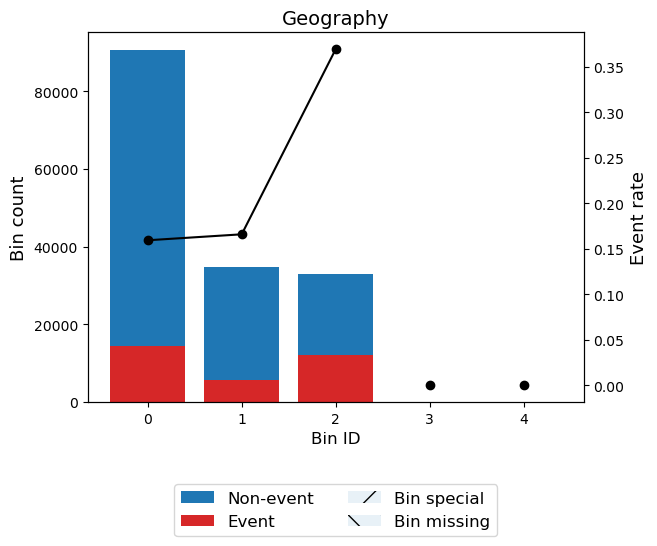

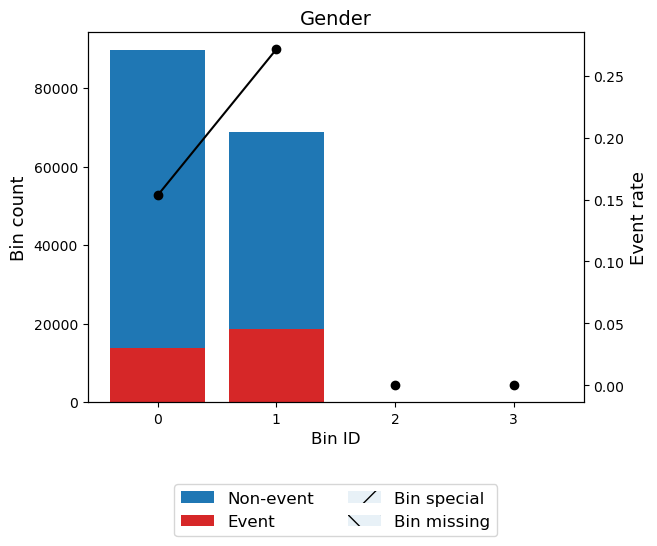

[None, None]

In [84]:
analisis_bi_multi.woegrafcat(df_train,df_train['Exited'])

### Analisis de Geography2 exclusivo

In [85]:
region2= df_train[df_train['Geography']==2]

In [86]:
region2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,588,2,0,36,4,131778.58,1,1,0,136024.31,1
9,583,2,0,40,4,81274.33,1,1,1,170843.07,0
10,599,2,1,27,6,161801.47,2,1,0,109184.24,0
11,687,2,0,40,3,90432.92,1,1,0,1676.92,0
17,645,2,1,55,8,120105.43,1,1,0,125083.29,1
...,...,...,...,...,...,...,...,...,...,...,...
158367,537,2,1,29,1,120599.95,1,1,1,173331.57,0
158368,576,2,1,26,4,114739.92,1,1,1,27654.64,1
158377,708,2,1,35,6,140791.57,2,1,1,102083.73,0
158381,676,2,1,29,4,139825.34,2,1,1,116672.02,0


In [87]:
region2['Balance'].describe()

count     33021.000000
mean     121193.969828
std       23177.862395
min           0.000000
25%      106933.920000
50%      122028.650000
75%      135795.630000
max      250898.090000
Name: Balance, dtype: float64

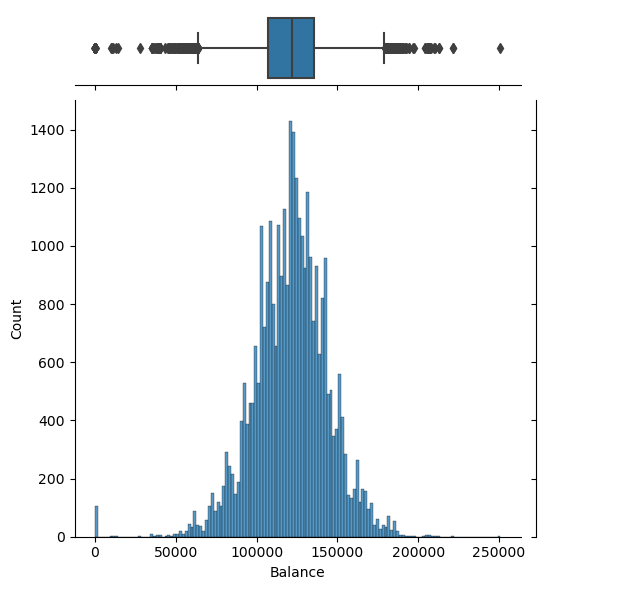

In [88]:
graf_func(region2,'Balance')

In [89]:
outliers.quantileoutlier(region2,'Balance',1.5).quantile(.75)

181813.15

In [90]:
outliers.quantileoutlier(region2,'Balance',1.5).quantile(.25)

51956.47

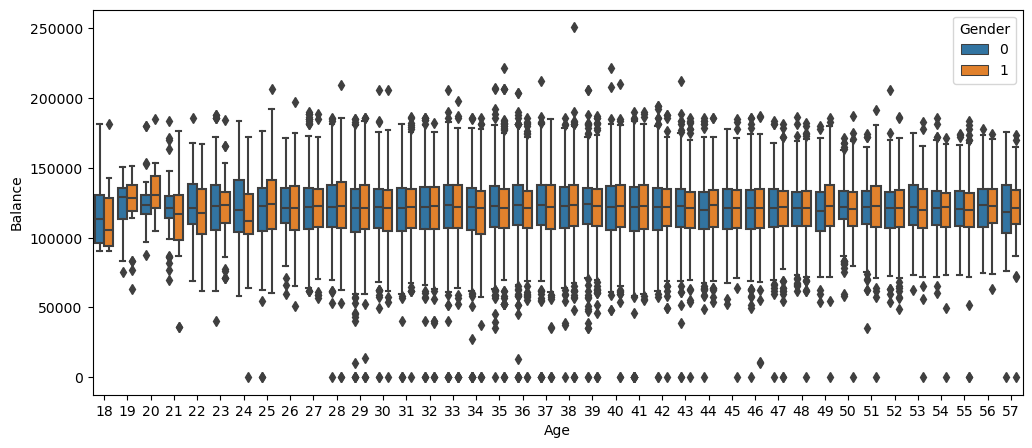

In [91]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age', y='Balance',hue='Gender',data=region2)
plt.show()

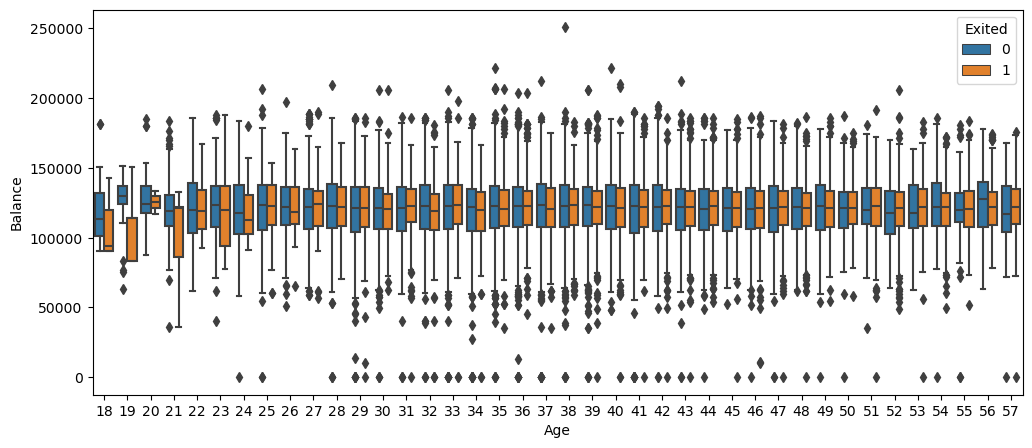

In [92]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age', y='Balance',hue='Exited',data=region2)
plt.show()

In [94]:
region2['Exited'].value_counts()

Exited
0    20823
1    12198
Name: count, dtype: int64

In [95]:
analisis_bi_multi.correlation(region2,'Exited')

D:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,Correlation,P-Value
CreditScore,-0.030886,1.980680e-08
Geography,NaN,NaN
Gender,0.163268,5.117629e-196
Age,0.427564,0.000000e+00
Tenure,-0.025446,3.754233e-06
Balance,-0.006043,2.721592e-01
NumOfProducts,-0.250981,0.000000e+00
HasCrCard,-0.007448,1.759557e-01
IsActiveMember,-0.262393,0.000000e+00
EstimatedSalary,0.019364,4.332998e-04


<Axes: >

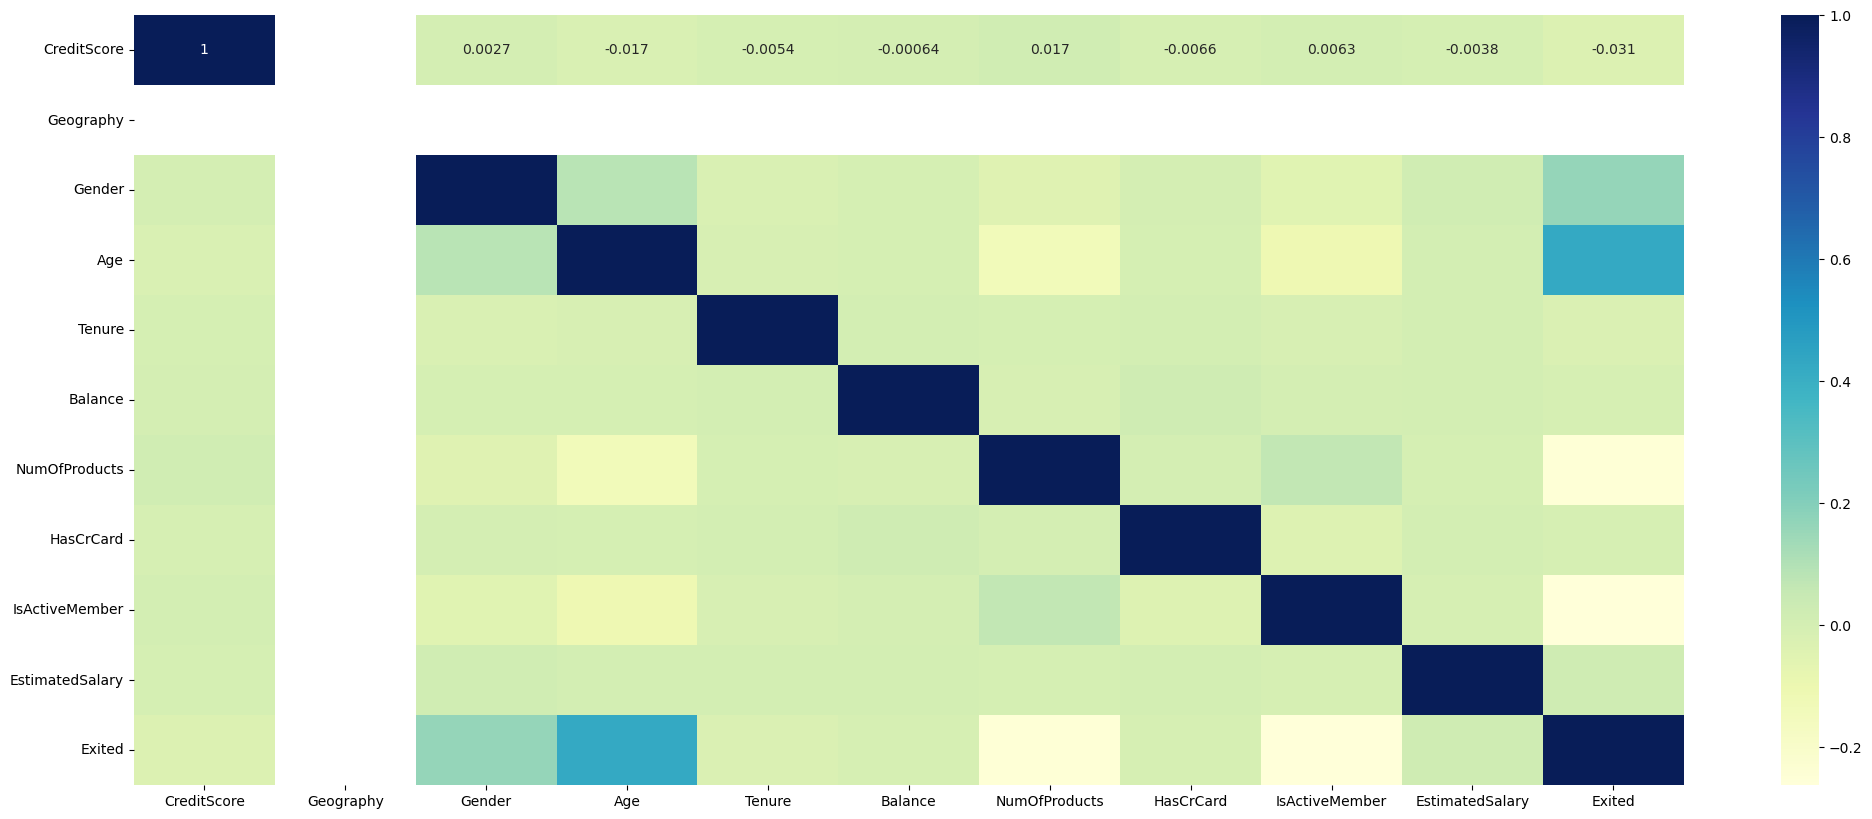

In [96]:
correlation= region2.astype('int64').corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')

In [97]:
analisis_bi_multi.varclus(region2.drop(columns=['Geography']))

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Age,0.71322,0.011343,0.290070
1,0,Exited,0.71322,0.068850,0.307985
2,1,HasCrCard,1.00000,0.001448,0.000000
3,2,CreditScore,1.00000,0.000673,0.000000
4,3,EstimatedSalary,1.00000,0.000244,0.000000
5,4,Tenure,1.00000,0.000549,0.000000
6,5,Balance,1.00000,0.000343,0.000000
7,6,NumOfProducts,1.00000,0.025555,0.000000
8,7,Gender,1.00000,0.021675,0.000000
9,8,IsActiveMember,1.00000,0.047701,0.000000


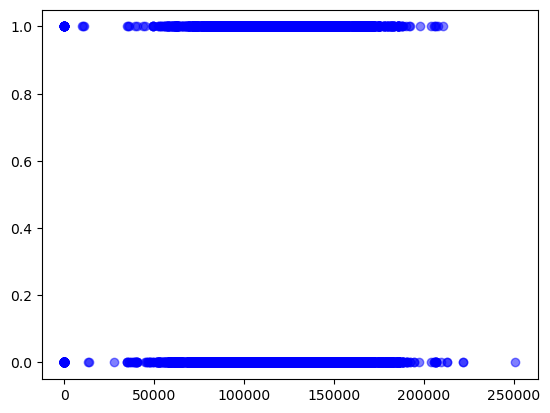

In [98]:
plt.scatter(x='Balance',y='Exited', data= region2,color='b', alpha=0.5)

In [99]:
analisis_bi_multi.woenum(region2,region2['Exited'])

{'CreditScore':                      Bin  Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 560.50)   3910   0.118409       2367   1543    0.394629   
 1       [560.50, 649.50)  11320   0.342812       6945   4375    0.386484   
 2       [649.50, 666.50)   2321   0.070289       1460    861    0.370961   
 3       [666.50, 771.50)  13061   0.395536       8411   4650    0.356022   
 4          [771.50, inf)   2409   0.072954       1640    769    0.319220   
 5                Special      0   0.000000          0      0    0.000000   
 6                Missing      0   0.000000          0      0    0.000000   
 Totals                    33021   1.000000      20823  12198    0.369401   
 
              WoE        IV            JS  
 0      -0.106891  0.001371  1.712622e-04  
 1      -0.072671  0.001827  2.283167e-04  
 2      -0.006689  0.000003  3.934463e-07  
 3       0.057887  0.001315  1.643640e-04  
 4       0.222574  0.003498  4.363455e-04  
 5            0.0  0.00000

In [100]:
analisis_bi_multi.woecat(region2,region2['Exited'])

{'Geography':             Bin  Count  Count (%)  Non-event  Event  Event rate  WoE   IV   JS
 0           [2]  33021        1.0      20823  12198    0.369401  0.0  0.0  0.0
 1       Special      0        0.0          0      0    0.000000  0.0  0.0  0.0
 2       Missing      0        0.0          0      0    0.000000  0.0  0.0  0.0
 Totals           33021        1.0      20823  12198    0.369401       0.0  0.0,
 'Gender':             Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]  17455   0.528603      12306   5149    0.294987  0.336498   
 1           [1]  15566   0.471397       8517   7049    0.452846 -0.345608   
 2       Special      0   0.000000          0      0    0.000000       0.0   
 3       Missing      0   0.000000          0      0    0.000000       0.0   
 Totals           33021   1.000000      20823  12198    0.369401             
 
               IV        JS  
 0       0.056822  0.007069  
 1       0.058360  0.007259  
 2       0.00000

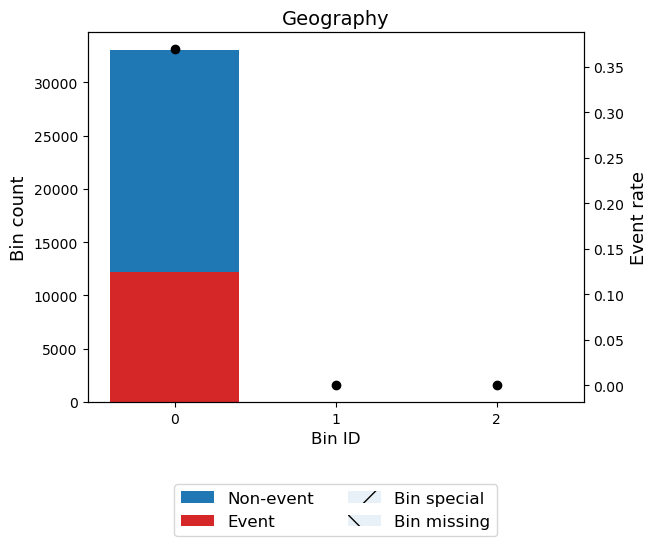

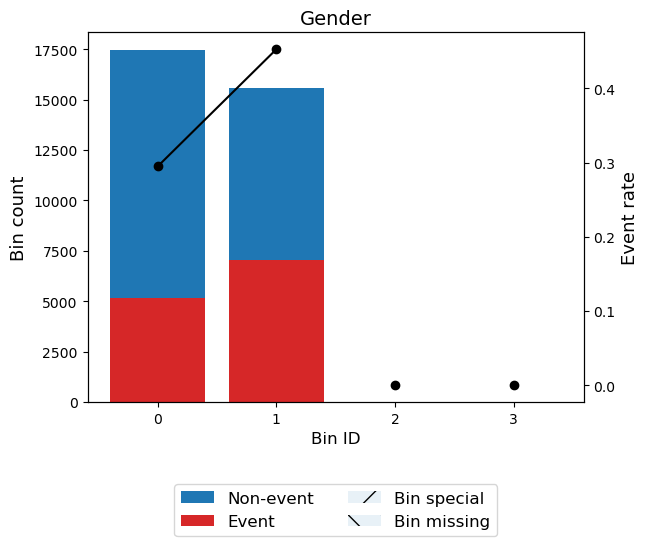

[None, None]

In [101]:
analisis_bi_multi.woegrafcat(region2,region2['Exited'])

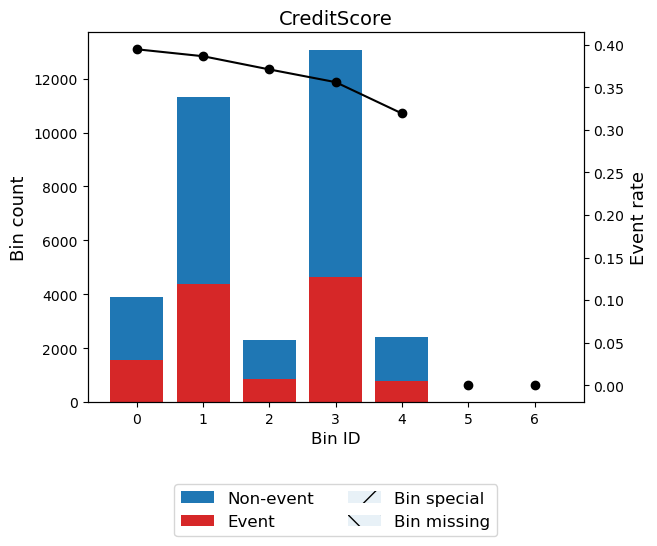

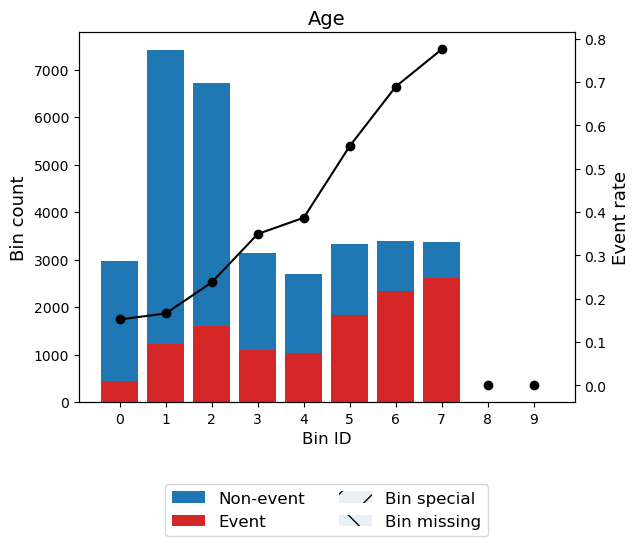

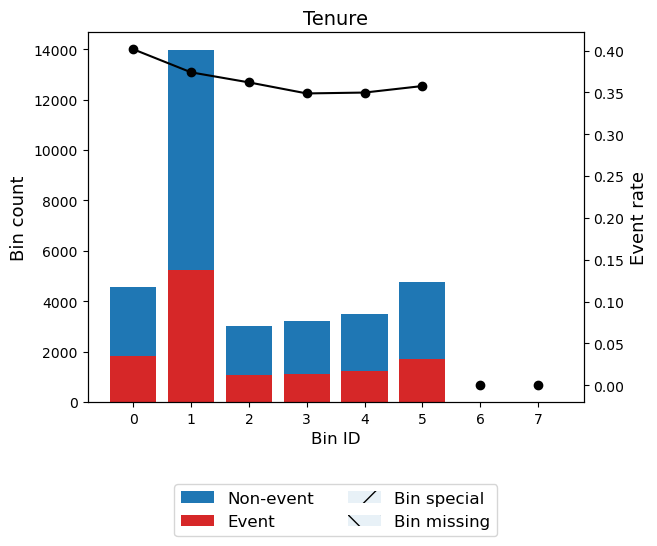

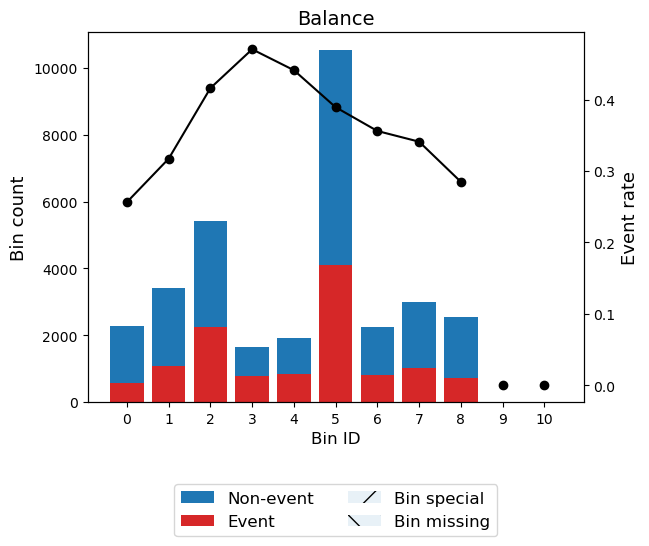

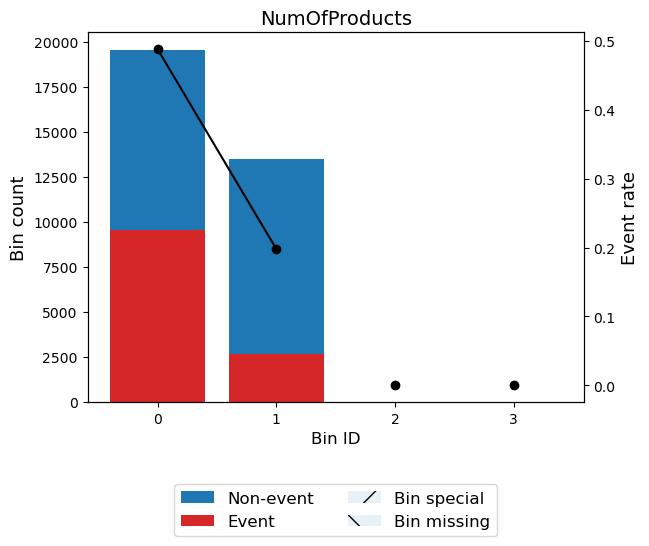

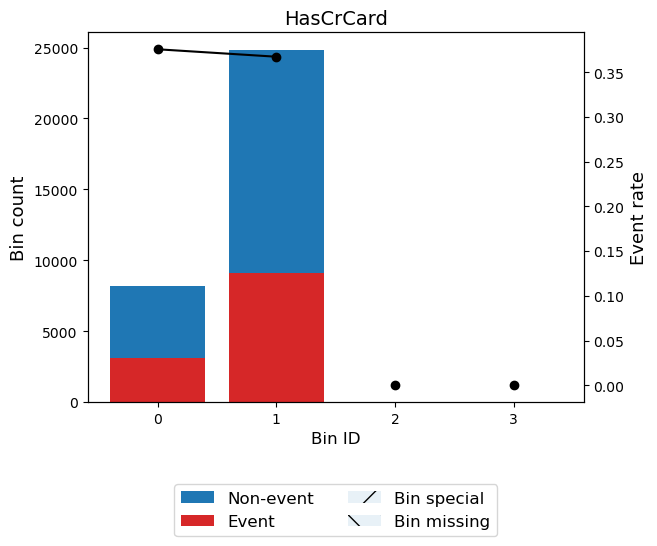

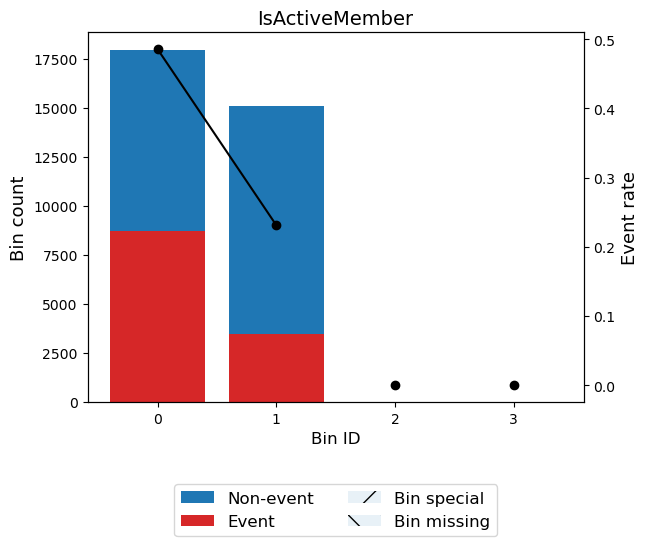

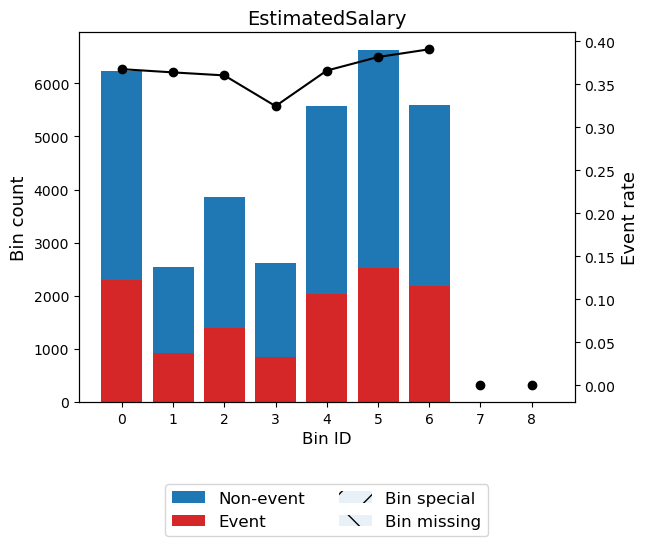

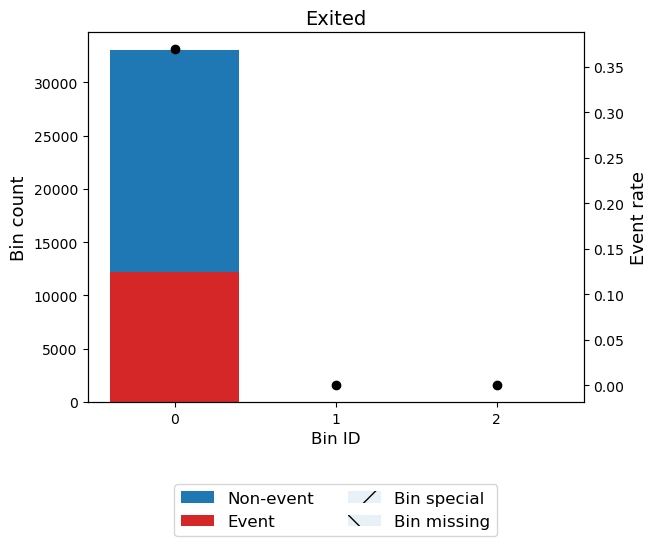

[None, None, None, None, None, None, None, None, None]

In [102]:
analisis_bi_multi.woegrafnum(region2,region2['Exited'])

In [103]:
region2= region2[region2['Balance']<181813.15].reset_index(drop=True)

In [104]:
region2= region2[region2['Balance']>51956.47].reset_index(drop=True)

In [105]:
region2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,588,2,0,36,4,131778.58,1,1,0,136024.31,1
1,583,2,0,40,4,81274.33,1,1,1,170843.07,0
2,599,2,1,27,6,161801.47,2,1,0,109184.24,0
3,687,2,0,40,3,90432.92,1,1,0,1676.92,0
4,645,2,1,55,8,120105.43,1,1,0,125083.29,1
...,...,...,...,...,...,...,...,...,...,...,...
32694,537,2,1,29,1,120599.95,1,1,1,173331.57,0
32695,576,2,1,26,4,114739.92,1,1,1,27654.64,1
32696,708,2,1,35,6,140791.57,2,1,1,102083.73,0
32697,676,2,1,29,4,139825.34,2,1,1,116672.02,0


### Analisis sin la región 2 en Geography

In [107]:
region01= df_train[df_train['Geography']!=2]

In [108]:
region01['Exited'].value_counts()

Exited
0    105162
1     20217
Name: count, dtype: int64

In [109]:
region2.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,32699.000000,32699.000000,32699.000000,32699.000000,32699.000000,32699.000000,32699.000000,32699.000000,32699.000000
mean,657.240435,38.689715,4.990764,121387.698288,1.446099,0.751950,0.456558,114052.512101,0.370623
std,80.456539,7.837627,2.845509,21460.005369,0.580056,0.431888,0.498117,49958.805976,0.482979
min,428.000000,18.000000,0.000000,51962.990000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,33.000000,3.000000,107106.330000,1.000000,1.000000,0.000000,75585.565000,0.000000
50%,658.000000,38.000000,5.000000,122028.650000,1.000000,1.000000,0.000000,119903.100000,0.000000
75%,712.000000,44.000000,7.000000,135555.660000,2.000000,1.000000,1.000000,157959.020000,1.000000
max,850.000000,57.000000,10.000000,181804.340000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [110]:
region01.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,125379.000000,125379.000000,125379.000000,125379.000000,125379.000000,125379.000000,125379.000000,125379.000000,125379.000000
mean,656.723343,36.702071,5.034152,37916.129542,1.586111,0.755270,0.498425,112418.487799,0.161247
std,79.161638,7.182871,2.792767,58238.504754,0.531461,0.429929,0.500000,50267.302995,0.367760
min,428.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74827.830000,0.000000
50%,661.000000,36.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117834.920000,0.000000
75%,710.000000,41.000000,7.000000,98108.790000,2.000000,1.000000,1.000000,154000.990000,0.000000
max,850.000000,57.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [111]:
analisis_bi_multi.woenum(region01,region01['Exited'])

{'CreditScore':                      Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 560.50)   14701   0.117252      11828   2873    0.195429   
 1       [560.50, 659.50)   47745   0.380805      39729   8016    0.167892   
 2       [659.50, 709.50)   31144   0.248399      26658   4486    0.144041   
 3       [709.50, 730.50)   11309   0.090199       9786   1523    0.134672   
 4          [730.50, inf)   20480   0.163345      17161   3319    0.162061   
 5                Special       0   0.000000          0      0    0.000000   
 6                Missing       0   0.000000          0      0    0.000000   
 Totals                    125379   1.000000     105162  20217    0.161247   
 
              WoE        IV            JS  
 0      -0.233865  0.006930  8.643281e-04  
 1      -0.048336  0.000904  1.130322e-04  
 2        0.13315  0.004208  5.255887e-04  
 3       0.211293  0.003745  4.672441e-04  
 4      -0.006002  0.000006  7.371225e-07  
 5            0.0

In [112]:
analisis_bi_multi.woecat(region01,region01['Exited'])

{'Geography':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   90658   0.723072      76204  14454    0.159434  0.013465   
 1           [1]   34721   0.276928      28958   5763    0.165980  -0.03459   
 2       Special       0   0.000000          0      0    0.000000       0.0   
 3       Missing       0   0.000000          0      0    0.000000       0.0   
 Totals           125379   1.000000     105162  20217    0.161247             
 
               IV        JS  
 0       0.000130  0.000016  
 1       0.000335  0.000042  
 2       0.000000  0.000000  
 3       0.000000  0.000000  
 Totals  0.000466  0.000058  ,
 'Gender':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   72207    0.57591      63598   8609    0.119227  0.350796   
 1           [1]   53172    0.42409      41564  11608    0.218310 -0.373438   
 2       Special       0    0.00000          0      0    0.000000       0.0   
 3  

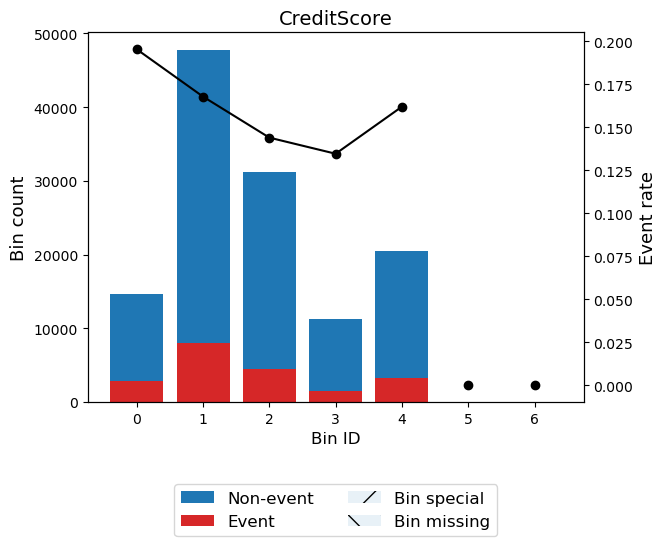

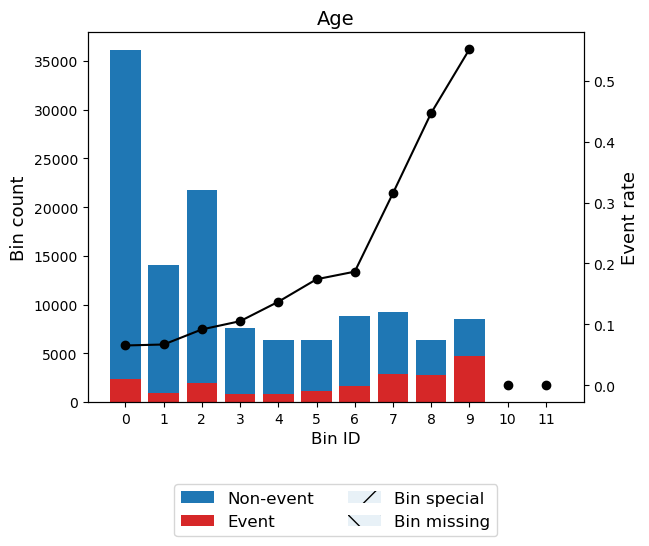

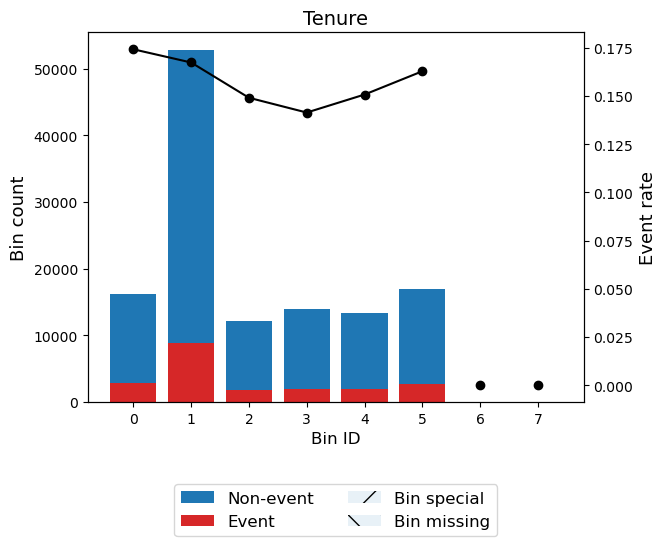

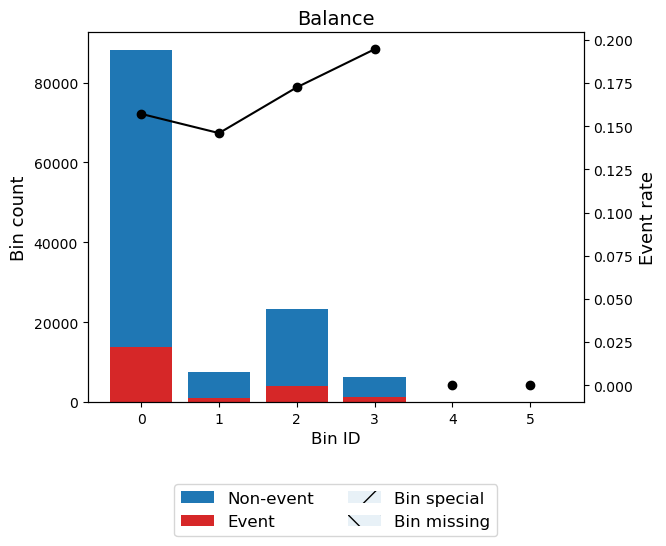

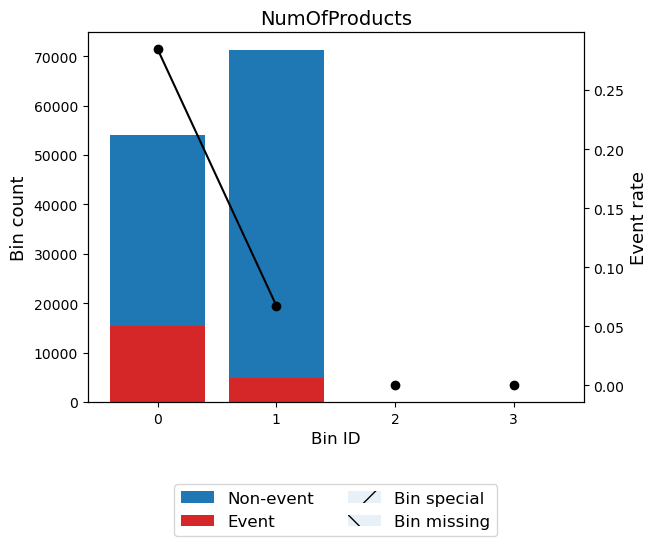

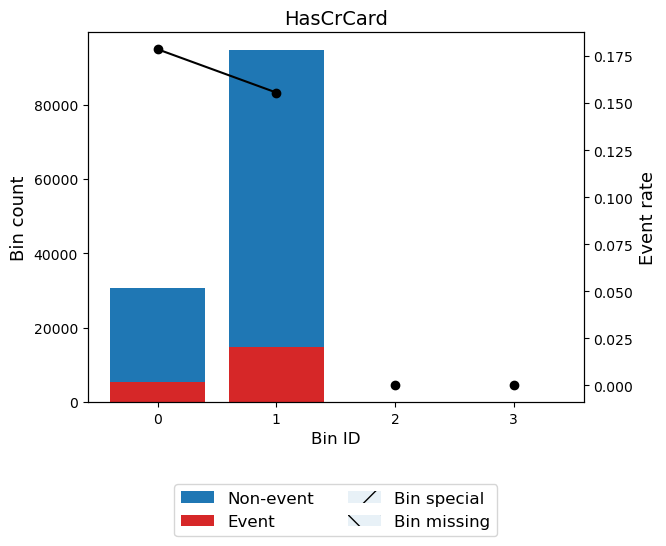

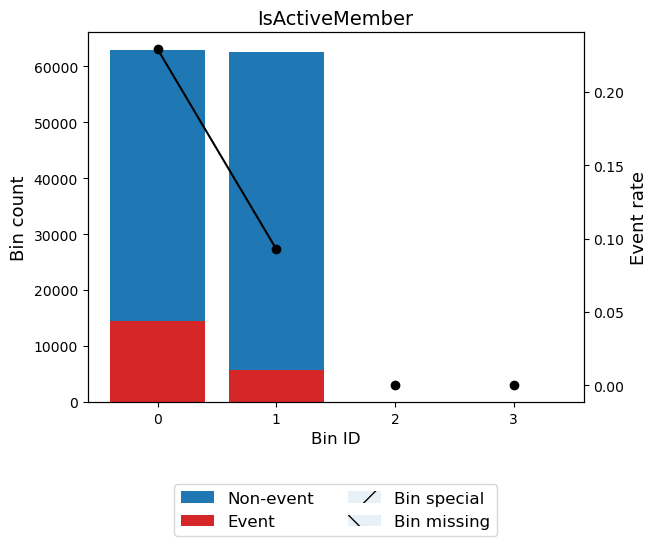

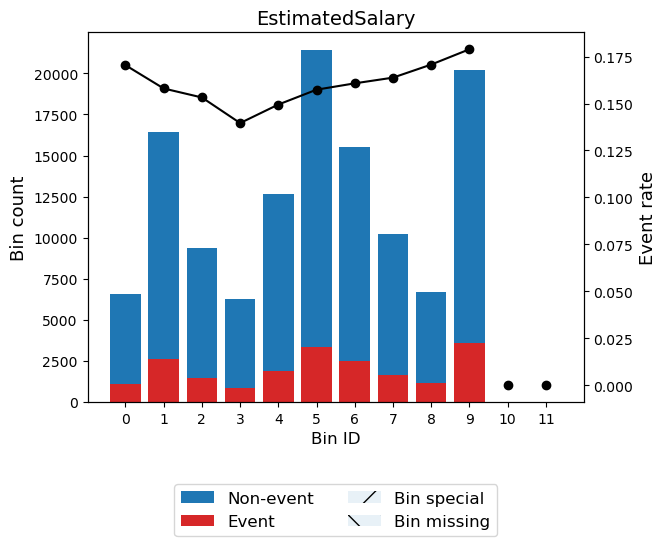

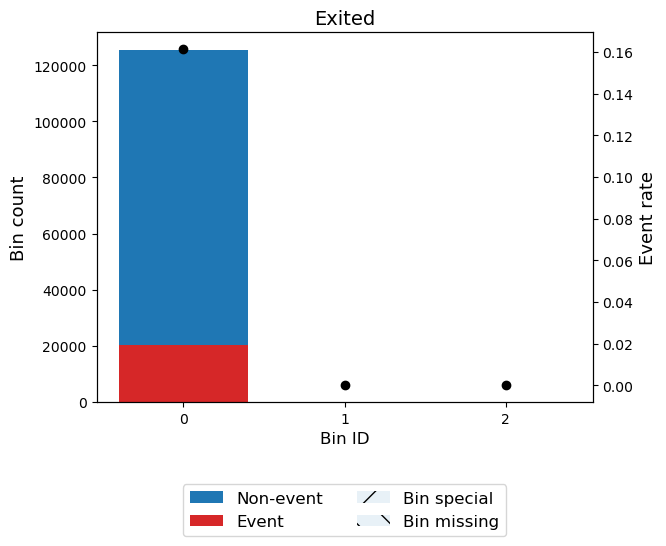

[None, None, None, None, None, None, None, None, None]

In [113]:
analisis_bi_multi.woegrafnum(region01,region01['Exited'])

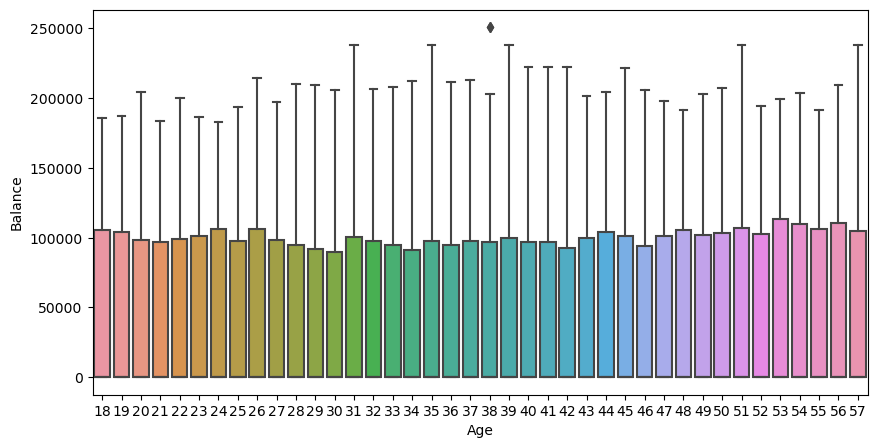

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',y='Balance', data=region01)
plt.show()

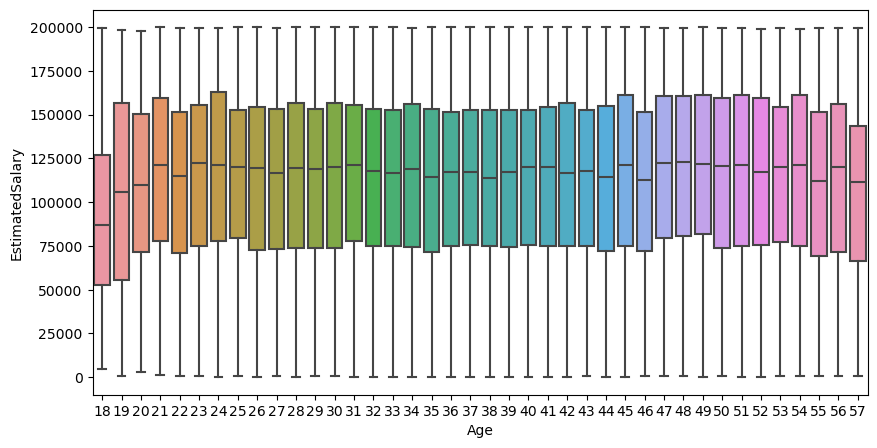

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',y='EstimatedSalary', data=region01)
plt.show()

In [115]:
analisis_bi_multi.varclus(region01)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Age,0.673024,0.005167,3.286745e-01
1,0,Exited,0.673024,0.034379,3.386176e-01
2,1,Balance,0.715556,0.000616,2.846193e-01
3,1,NumOfProducts,0.715556,0.036383,2.951839e-01
4,2,HasCrCard,1.000000,0.000564,0.000000e+00
5,3,Tenure,1.000000,0.000189,0.000000e+00
6,4,EstimatedSalary,1.000000,0.000136,0.000000e+00
7,5,CreditScore,1.000000,0.000593,2.221764e-16
8,6,Geography,1.000000,0.000341,0.000000e+00
9,7,IsActiveMember,1.000000,0.018716,0.000000e+00


<Axes: >

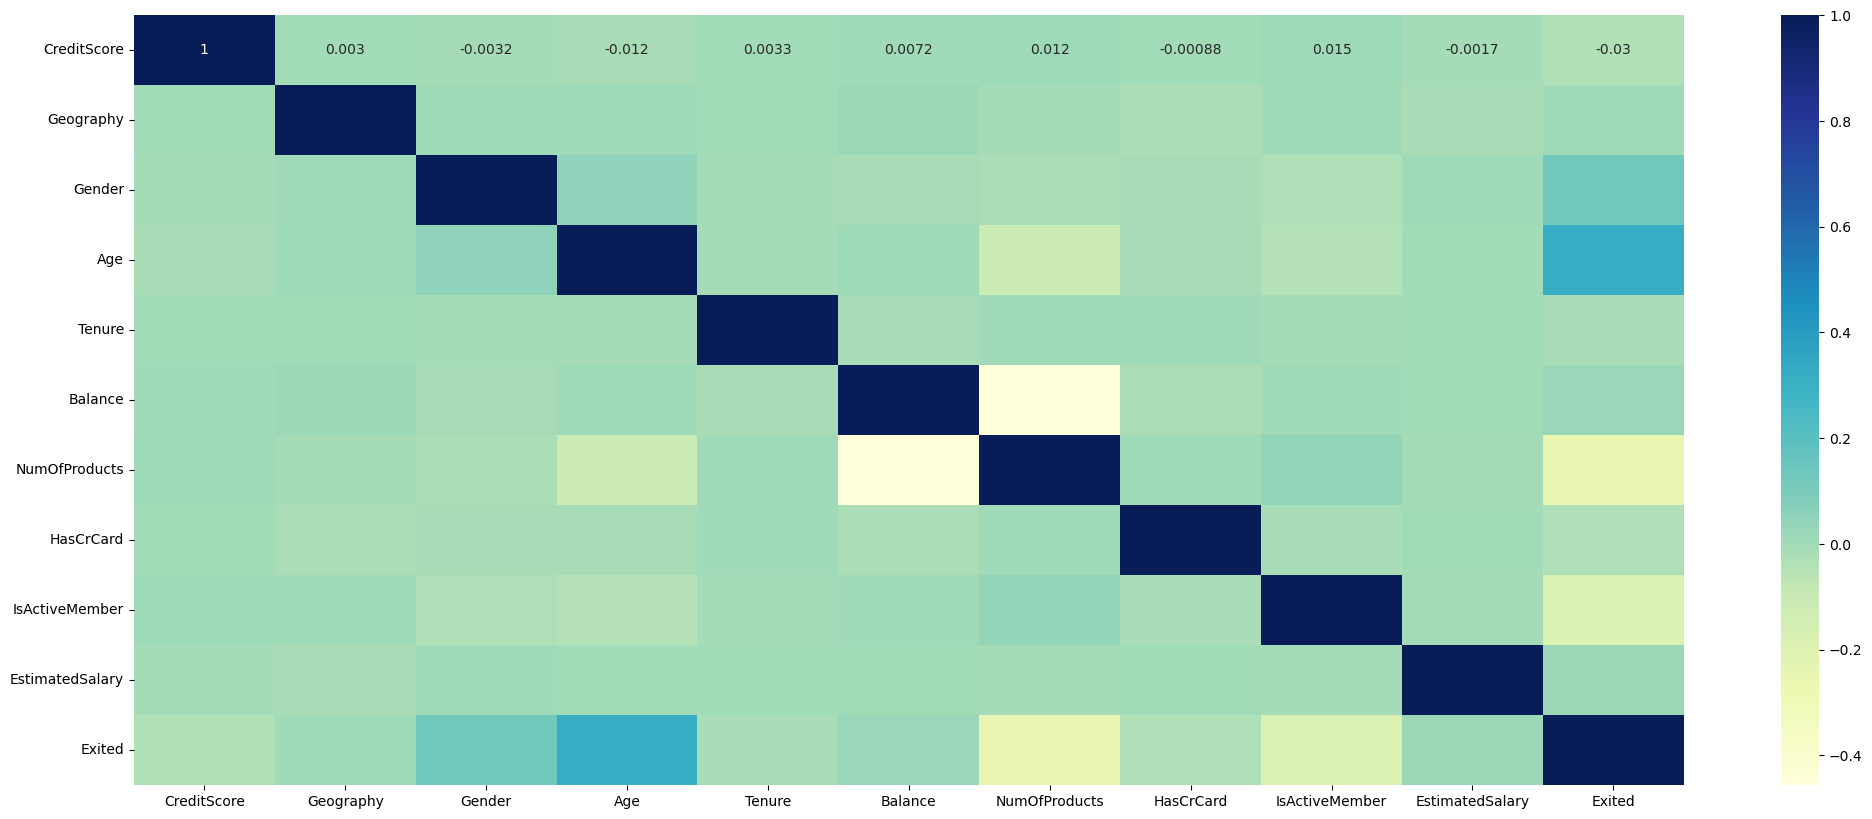

In [116]:
correlation= region01.astype('int64').corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')

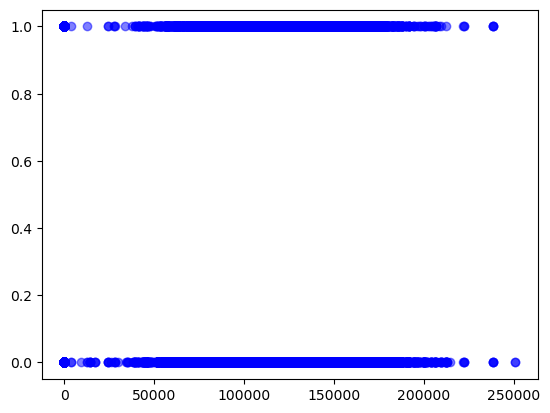

In [117]:
plt.scatter(x='Balance',y='Exited', data= region01,color='b', alpha=0.5)

In [119]:
df_new= pd.concat([region01, region2], ignore_index=True)

In [148]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158078 entries, 0 to 158077
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      158078 non-null  int64  
 1   Geography        158078 non-null  object 
 2   Gender           158078 non-null  object 
 3   Age              158078 non-null  int64  
 4   Tenure           158078 non-null  int64  
 5   Balance          158078 non-null  float64
 6   NumOfProducts    158078 non-null  int64  
 7   HasCrCard        158078 non-null  int64  
 8   IsActiveMember   158078 non-null  int64  
 9   EstimatedSalary  158078 non-null  float64
 10  Exited           158078 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 13.3+ MB


### ANALYSIS WITH DUMMIES

In [156]:
df_train_dummies= pd.get_dummies(df_new,columns=['Geography'],dtype='int64')
#df_test_dummies= pd.get_dummies(df_new,columns=['Geography'],dtype='int64')

In [157]:
df_train_dummies= pd.get_dummies(df_train_dummies,columns=['Gender','HasCrCard','IsActiveMember'],drop_first=True,dtype='int64')
#df_test_dummies= pd.get_dummies(df_test_dummies,columns=['Gender','HasCrCard','IsActiveMember'],drop_first=True,dtype='int64')

In [158]:
df_train_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
0,668,33,3,0.00,2,181449.97,0,1,0,0,0,1,0
1,627,33,1,0.00,2,49503.50,0,1,0,0,0,1,1
2,678,40,10,0.00,2,184866.69,0,1,0,0,0,1,0
3,581,34,2,148882.54,1,84560.88,0,1,0,0,0,1,1
4,716,33,5,0.00,2,15068.83,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158073,537,29,1,120599.95,1,173331.57,0,0,0,1,1,1,1
158074,576,26,4,114739.92,1,27654.64,1,0,0,1,1,1,1
158075,708,35,6,140791.57,2,102083.73,0,0,0,1,1,1,1
158076,676,29,4,139825.34,2,116672.02,0,0,0,1,1,1,1


In [159]:
corr= stats.spearmanr(df_train_dummies[['Exited','Geography_0','Gender_1','Balance']])
corr[0][0]

array([ 1.        , -0.12971604,  0.14489709,  0.12536266])

In [160]:
corr= stats.spearmanr(df_train_dummies[['Exited','Geography_1','Gender_1','Balance']])
corr[0][0]

array([ 1.        , -0.0507377 ,  0.14489709,  0.12536266])

In [161]:
corr= stats.spearmanr(df_train_dummies[['Exited','Geography_2','Gender_1','Balance']])
corr[0][0]

array([1.        , 0.21024366, 0.14489709, 0.12536266])

In [162]:
analisis_bi_multi.olstest(df_train_dummies,'Exited')

{'CreditScore': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                     P>F  df constraint  df denom
 const  [[1218.2102508140804]]  6.974128021231201e-266              1  158076.0
 x      [[115.90734324204726]]   5.089052013647172e-27              1  158076.0,
 'Age': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[13817.673376260045]]  0.0              1  158076.0
 x        [[26602.2420623906]]  0.0              1  158076.0,
 'Tenure': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                    P>F  df constraint  df denom
 const  [[10994.358428009828]]                    0.0              1  158076.0
 x      [[57.093904817540505]]  4.177132160097997e-14              1  158076.0,
 'Balance': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[14033.9

In [163]:
analisis_bi_multi.correlation(df_train_dummies,'Exited')

,Correlation,P-Value
CreditScore,-0.028793,2.348066e-30
Age,0.358623,0.000000e+00
Tenure,-0.018747,9.041162e-14
Balance,0.125363,0.000000e+00
NumOfProducts,-0.265238,0.000000e+00
EstimatedSalary,0.019903,2.491234e-15
Geography_0,-0.129716,0.000000e+00
Geography_1,-0.050738,1.308788e-90
Geography_2,0.210244,0.000000e+00
Gender_1,0.144897,0.000000e+00


<Axes: >

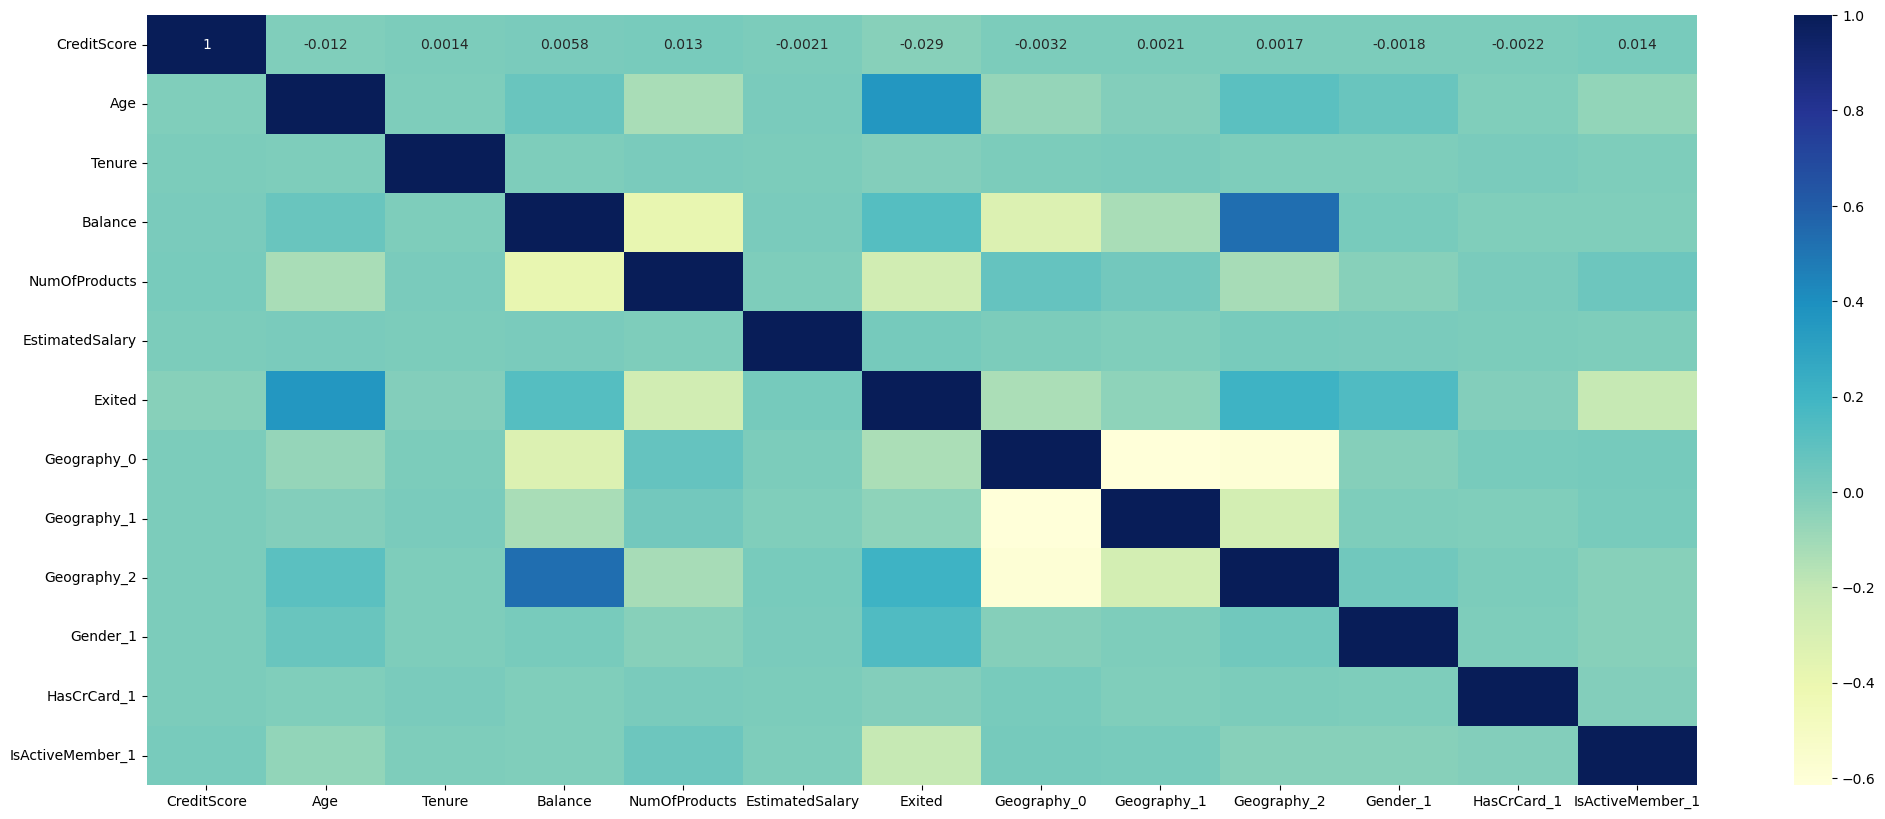

In [164]:
correlation= df_train_dummies.astype('int64').corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')

In [165]:
analisis_bi_multi.varclus(df_train_dummies)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Balance,0.769714,0.134633,2.661137e-01
1,0,Geography_2,0.769714,0.037004,2.391349e-01
2,1,Geography_0,0.807605,0.277825,2.664110e-01
3,1,Geography_1,0.807605,0.052301,2.030132e-01
4,2,Age,0.689767,0.012670,3.142137e-01
5,2,Exited,0.689767,0.046085,3.252205e-01
6,3,CreditScore,1.000000,0.000542,2.221651e-16
7,4,Tenure,1.000000,0.000294,0.000000e+00
8,5,HasCrCard_1,1.000000,0.000455,0.000000e+00
9,6,EstimatedSalary,1.000000,0.000204,0.000000e+00


In [166]:
corr= stats.spearmanr(df_train_dummies[['Exited','Balance','Geography_2']])
corr

SignificanceResult(statistic=array([[1.        , 0.12536266, 0.21024366],
       [0.12536266, 1.        , 0.5267975 ],
       [0.21024366, 0.5267975 , 1.        ]]), pvalue=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))

In [167]:
corr= stats.spearmanr(df_train_dummies[['Exited','Geography_0','Geography_1']])
corr

SignificanceResult(statistic=array([[ 1.        , -0.12971604, -0.0507377 ],
       [-0.12971604,  1.        , -0.61520932],
       [-0.0507377 , -0.61520932,  1.        ]]), pvalue=array([[0.00000000e+00, 0.00000000e+00, 1.30878836e-90],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30878836e-90, 0.00000000e+00, 0.00000000e+00]]))

In [168]:
analisis_bi_multi.woenum(df_train_dummies,df_train_dummies['Exited'])

{'CreditScore':                      Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 560.50)   18575   0.117505      14172   4403    0.237039   
 1       [560.50, 659.50)   60457   0.382450      47540  12917    0.213656   
 2       [659.50, 709.50)   38661   0.244569      31532   7129    0.184398   
 3       [709.50, 730.50)   14066   0.088981      11576   2490    0.177023   
 4          [730.50, inf)   26319   0.166494      20922   5397    0.205061   
 5                Special       0   0.000000          0      0    0.000000   
 6                Missing       0   0.000000          0      0    0.000000   
 Totals                    158078   1.000000     125742  32336    0.204557   
 
              WoE        IV            JS  
 0      -0.189069  0.004435  5.535509e-04  
 1      -0.055024  0.001177  1.470750e-04  
 2       0.128781  0.003902  4.874385e-04  
 3         0.1786  0.002689  3.357145e-04  
 4      -0.003093  0.000002  1.992848e-07  
 5            0.0

In [169]:
columns_scale= ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

scaler = MinMaxScaler()
df_train_dummies[columns_scale]= scaler.fit_transform(df_train_dummies[columns_scale])
#df_test[columns_scale]= scaler.fit_transform(df_test[columns_scale])

In [170]:
df_train_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
0,0.568720,0.384615,0.3,0.000000,0.333333,0.907279,0,1,0,0,0,1,0
1,0.471564,0.384615,0.1,0.000000,0.333333,0.247483,0,1,0,0,0,1,1
2,0.592417,0.564103,1.0,0.000000,0.333333,0.924364,0,1,0,0,0,1,0
3,0.362559,0.410256,0.2,0.593398,0.000000,0.422787,0,1,0,0,0,1,1
4,0.682464,0.384615,0.5,0.000000,0.333333,0.075293,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158073,0.258294,0.282051,0.1,0.480673,0.000000,0.866683,0,0,0,1,1,1,1
158074,0.350711,0.205128,0.4,0.457317,0.000000,0.138229,1,0,0,1,1,1,1
158075,0.663507,0.435897,0.6,0.561150,0.333333,0.510409,0,0,0,1,1,1,1
158076,0.587678,0.282051,0.4,0.557299,0.333333,0.583358,0,0,0,1,1,1,1


### df_train_dummies Variable Selection

In [171]:
df_train_dummies.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Geography_0', 'Geography_1',
       'Geography_2', 'Gender_1', 'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

In [172]:
var_selection.randomforest(df_train_dummies,'Exited','log_loss')

Feature 0: 0.16783945047279147
Feature 1: 0.2124606105438847
Feature 2: 0.08210706001716758
Feature 3: 0.11898999488633212
Feature 4: 0.13906343061893994
Feature 5: 0.17957926401077073
Feature 6: 0.00735318175631908
Feature 7: 0.005388641677690073
Feature 8: 0.01961141075583912
Feature 9: 0.017316860392499682
Feature 10: 0.01156543315468812
Feature 11: 0.038724661713077334


In [173]:
var_selection.decisiontrees(df_train_dummies,'Exited')

Feature 0: 0.1630716816589616
Feature 1: 0.2075475204308539
Feature 2: 0.07676833004602232
Feature 3: 0.12698363878585073
Feature 4: 0.13806396970708945
Feature 5: 0.19720584609493333
Feature 6: 0.00816297090086276
Feature 7: 0.007584439701004686
Feature 8: 0.014513030182319175
Feature 9: 0.011943602956391583
Feature 10: 0.014967452727527182
Feature 11: 0.03318751680818338


In [174]:
var_selection.adaboost(df_train_dummies,'Exited')

Feature 0: 0.08
Feature 1: 0.44
Feature 2: 0.06
Feature 3: 0.16
Feature 4: 0.08
Feature 5: 0.08
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.04
Feature 9: 0.02
Feature 10: 0.02
Feature 11: 0.02


In [175]:
var_selection.gradientboost(df_train_dummies,'Exited')

Feature 0: 0.0019772227442963206
Feature 1: 0.4103681742511721
Feature 2: 0.000771818875102383
Feature 3: 0.04414233877948675
Feature 4: 0.3370052181905322
Feature 5: 0.0015830750217797254
Feature 6: 0.008136308687148687
Feature 7: 0.0006148381658449988
Feature 8: 0.06467782255490026
Feature 9: 0.027521905358554363
Feature 10: 0.0010474640935473798
Feature 11: 0.10215381327763474


### Analysis with buckets

In [146]:
df_train_1= df_new

In [147]:
analisis_bi_multi.woenum(df_train,df_train['Exited'])

{'CreditScore':                      Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 560.50)   18611   0.117494      14195   4416    0.237279   
 1       [560.50, 659.50)   60571   0.382393      47629  12942    0.213667   
 2       [659.50, 709.50)   38740   0.244571      31593   7147    0.184486   
 3       [709.50, 730.50)   14101   0.089021      11602   2499    0.177221   
 4          [730.50, inf)   26377   0.166521      20966   5411    0.205141   
 5                Special       0   0.000000          0      0    0.000000   
 6                Missing       0   0.000000          0      0    0.000000   
 Totals                    158400   1.000000     125985  32415    0.204640   
 
              WoE        IV            JS  
 0      -0.189886  0.004474  5.584016e-04  
 1      -0.054578  0.001157  1.446581e-04  
 2       0.128701  0.003898  4.868565e-04  
 3       0.177745  0.002666  3.327543e-04  
 4      -0.003073  0.000002  1.967960e-07  
 5            0.0

In [128]:
df_train_1['CreditScore_660']= np.where(df_train_1['CreditScore']<=660,1,0)
df_train_1['CreditScore_660_689']= np.where((df_train_1['CreditScore']>660) & (df_train_1['CreditScore']<=689),1,0)
df_train_1['CreditScore_689_730']= np.where((df_train_1['CreditScore']>689) & (df_train_1['CreditScore']<=730),1,0)
df_train_1['CreditScore_730']= np.where(df_train_1['CreditScore']>730,1,0)

df_test_1['CreditScore_660']= np.where(df_test_1['CreditScore']<=660,1,0)
df_test_1['CreditScore_660_689']= np.where((df_test_1['CreditScore']>660) & (df_test_1['CreditScore']<=689),1,0)
df_test_1['CreditScore_689_730']= np.where((df_test_1['CreditScore']>689) & (df_test_1['CreditScore']<=730),1,0)
df_test_1['CreditScore_730']= np.where(df_test_1['CreditScore']>730,1,0)

df_train_1['Age_37']= np.where(df_train_1['Age']<=37,1,0)
df_train_1['Age_37_40']= np.where((df_train_1['Age']>37) & (df_train_1['Age']<=40),1,0)
df_train_1['Age_40']= np.where(df_train_1['Age']>40,1,0)

df_test_1['Age_37']= np.where(df_test_1['Age']<=37,1,0)
df_test_1['Age_37_40']= np.where((df_test_1['Age']>37) & (df_test_1['Age']<=40),1,0)
df_test_1['Age_40']= np.where(df_test_1['Age']>40,1,0)

df_train_1['EstimatedSalary_1']= np.where(df_train_1['EstimatedSalary']<=30186.07,1,0)
df_train_1['EstimatedSalary_2']= np.where((df_train_1['EstimatedSalary']>30186.07) & (df_train_1['EstimatedSalary']<=50973.64),1,0)
df_train_1['EstimatedSalary_3']= np.where((df_train_1['EstimatedSalary']>50973.64) & (df_train_1['EstimatedSalary']<=131043.75),1,0)
df_train_1['EstimatedSalary_4']= np.where((df_train_1['EstimatedSalary']>131043.75) & (df_train_1['EstimatedSalary']<=160976.65),1,0)
df_train_1['EstimatedSalary_5']= np.where(df_train_1['EstimatedSalary']>160976.65,1,0)

df_test_1['EstimatedSalary_1']= np.where(df_test_1['EstimatedSalary']<=30186.07,1,0)
df_test_1['EstimatedSalary_2']= np.where((df_test_1['EstimatedSalary']>30186.07) & (df_test_1['EstimatedSalary']<=50973.64),1,0)
df_test_1['EstimatedSalary_3']= np.where((df_test_1['EstimatedSalary']>50973.64) & (df_test_1['EstimatedSalary']<=131043.75),1,0)
df_test_1['EstimatedSalary_4']= np.where((df_test_1['EstimatedSalary']>131043.75) & (df_test_1['EstimatedSalary']<=160976.65),1,0)
df_test_1['EstimatedSalary_5']= np.where(df_test_1['EstimatedSalary']>160976.65,1,0)

df_train_1['Tenure_1']= np.where(df_train_1['Tenure']<=5,1,0)
df_train_1['Tenure_2_3']= np.where((df_train_1['Tenure']>5) & (df_train_1['Tenure']<=8),1,0)
df_train_1['Tenure_4']= np.where(df_train_1['Tenure']>8,1,0)

df_test_1['Tenure_1']= np.where(df_test_1['Tenure']<=5,1,0)
df_test_1['Tenure_2_3']= np.where((df_test_1['Tenure']>5) & (df_test_1['Tenure']<=8),1,0)
df_test_1['Tenure_4']= np.where(df_test_1['Tenure']>8,1,0)

df_train_1['NumOfProducts_1']= np.where(df_train_1['NumOfProducts']>1,1,0)
#df_train['NumOfProducts_2']= np.where(df_train['NumOfProducts'].isin([2,3,4]),1,0)

df_test_1['NumOfProducts_1']= np.where(df_test_1['NumOfProducts']>1,1,0)
#df_test_1['NumOfProducts_2']= np.where(df_test_1['NumOfProducts'].isin([2,3,4]),1,0)

df_train_1['Balance_1']= np.where(df_train_1['Balance']<=88915.71,1,0)
df_train_1['Balance_2']= np.where((df_train_1['Balance']>88915.71) & (df_train_1['Balance']<=110349.51),1,0)
df_train_1['Balance_3']= np.where((df_train_1['Balance']>110349.51) & (df_train_1['Balance']<=137986.73),1,0)
df_train_1['Balance_4']= np.where(df_train_1['Balance']>137986.73,1,0)

df_test_1['Balance_1']= np.where(df_test_1['Balance']<=88915.71,1,0)
df_test_1['Balance_2']= np.where((df_test_1['Balance']>88915.71) & (df_test_1['Balance']<=110349.51),1,0)
df_test_1['Balance_3']= np.where((df_test_1['Balance']>110349.51) & (df_test_1['Balance']<=137786.73),1,0)
df_test_1['Balance_4']= np.where(df_test_1['Balance']>137986.73,1,0)

#df_train= pd.get_dummies(df_train,columns=['Geography'],dtype='int64')
#df_train['Geography_0_1']= np.where(df_train['Geography'].isin([0,1]),1,0)
df_train_1['Geography_2']= np.where(df_train_1['Geography'].isin([2]),1,0)

#df_test_1= pd.get_dummies(df_test_1,columns=['Geography'],dtype='int64')
#df_test_1['Geography_0_1']= np.where(df_test_1['Geography'].isin([0,1]),1,0)
df_test_1['Geography_2']= np.where(df_test_1['Geography'].isin([2]),1,0)

In [129]:
df_train_1= df_train_1.drop(columns=['CreditScore','Age','EstimatedSalary','Tenure','NumOfProducts','Balance','Geography'])
df_test_1= df_test_1.drop(columns=['CreditScore','Age','EstimatedSalary','Tenure','NumOfProducts','Balance','Geography'])

In [130]:
int_32= df_train_1.select_dtypes(exclude=['int64','object']).columns

df_train_1[int_32]= df_train_1[int_32].astype('int64')

<Axes: xlabel='Exited'>

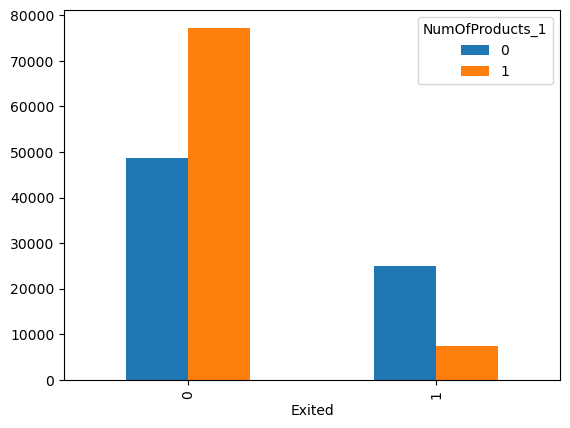

In [131]:
df_train_1.groupby(['Exited','NumOfProducts_1']).size().unstack().plot(kind='bar',stacked=False)

In [132]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158400 entries, 0 to 158399
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               158400 non-null  object
 1   HasCrCard            158400 non-null  int64 
 2   IsActiveMember       158400 non-null  int64 
 3   Exited               158400 non-null  int64 
 4   CreditScore_660      158400 non-null  int64 
 5   CreditScore_660_689  158400 non-null  int64 
 6   CreditScore_689_730  158400 non-null  int64 
 7   CreditScore_730      158400 non-null  int64 
 8   Age_37               158400 non-null  int64 
 9   Age_37_40            158400 non-null  int64 
 10  Age_40               158400 non-null  int64 
 11  EstimatedSalary_1    158400 non-null  int64 
 12  EstimatedSalary_2    158400 non-null  int64 
 13  EstimatedSalary_3    158400 non-null  int64 
 14  EstimatedSalary_4    158400 non-null  int64 
 15  EstimatedSalary_5    158400 non-nu

In [133]:
df_train_1['NumOfProducts_1'].value_counts()

NumOfProducts_1
1    84726
0    73674
Name: count, dtype: int64

In [134]:
analisis_bi_multi.olstest(df_train_1,'Exited')

{'Gender': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[13248.365497430186]]  0.0              1  158398.0
 x      [[3398.7529927403843]]  0.0              1  158398.0,
 'HasCrCard': <class 'statsmodels.stats.contrast.WaldTestResults'>
                            F                   P>F  df constraint  df denom
 const  [[11586.13899714381]]                   0.0              1  158398.0
 x      [[76.42862017569776]]  2.30487485189054e-18              1  158398.0,
 'IsActiveMember': <class 'statsmodels.stats.contrast.WaldTestResults'>
                            F  P>F  df constraint  df denom
 const  [[42459.90057884286]]  0.0              1  158398.0
 x      [[7031.115323406072]]  0.0              1  158398.0,
 'CreditScore_660': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                     P>F  df constraint  df denom
 const  [[17545.702720872967]]                 

In [135]:
analisis_bi_multi.correlation(df_train_1,'Exited')

,Correlation,P-Value
Gender,0.144936,0.000000e+00
HasCrCard,-0.021961,2.304875e-18
IsActiveMember,-0.206161,0.000000e+00
CreditScore_660,0.035865,2.983167e-46
CreditScore_660_689,-0.020651,2.038523e-16
CreditScore_689_730,-0.027949,9.405962e-29
CreditScore_730,0.000555,8.252658e-01
Age_37,-0.305892,0.000000e+00
Age_37_40,-0.037036,3.302508e-49
Age_40,0.365397,0.000000e+00


In [136]:
analisis_bi_multi.varclus(df_train_1)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Balance_1,0.770481,0.354922,3.558012e-01
1,0,Geography_2,0.770481,0.131584,2.642966e-01
2,1,Age_37,0.854056,0.232674,1.901989e-01
3,1,Age_40,0.854056,0.133515,1.684328e-01
4,2,Tenure_1,0.872999,0.195605,1.578838e-01
5,2,Tenure_2_3,0.872999,0.071471,1.367765e-01
6,3,CreditScore_660,0.733769,0.201265,3.333153e-01
7,3,CreditScore_689_730,0.733769,0.043353,2.782957e-01
8,4,EstimatedSalary_5,0.743648,0.069138,2.753923e-01
9,4,EstimatedSalary_3,0.743648,0.211507,3.251165e-01


In [137]:
corr= stats.spearmanr(df_train_1[['Exited','Balance_1','Geography_2',]])
corr

SignificanceResult(statistic=array([[ 1.        , -0.13498509,  0.20958502],
       [-0.13498509,  1.        , -0.5409613 ],
       [ 0.20958502, -0.5409613 ,  1.        ]]), pvalue=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))

In [138]:
corr= stats.spearmanr(df_train_1[['Exited','Age_40','Age_37']])
corr

SignificanceResult(statistic=array([[ 1.        ,  0.36539724, -0.30589192],
       [ 0.36539724,  1.        , -0.70811106],
       [-0.30589192, -0.70811106,  1.        ]]), pvalue=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))

In [139]:
analisis_bi_multi.woenum(df_train_1,df_train_1['Exited'])

{'HasCrCard':                  Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0       (-inf, 0.50)   38883   0.245473      30322   8561    0.220173   
 1        [0.50, inf)  119517   0.754527      95663  23854    0.199587   
 2            Special       0   0.000000          0      0    0.000000   
 3            Missing       0   0.000000          0      0    0.000000   
 Totals                158400   1.000000     125985  32415    0.204640   
 
              WoE        IV        JS  
 0      -0.092885  0.002176  0.000272  
 1       0.031338  0.000734  0.000092  
 2            0.0  0.000000  0.000000  
 3            0.0  0.000000  0.000000  
 Totals            0.002910  0.000364  ,
 'IsActiveMember':                  Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0       (-inf, 0.50)   80835   0.510322      57707  23128    0.286114   
 1        [0.50, inf)   77565   0.489678      68278   9287    0.119732   
 2            Special       0   0.000000          0      0  

In [140]:
analisis_bi_multi.woecat(df_train_1,df_train_1['Exited'])

{'Gender':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   89662   0.566048      75904  13758    0.153443  0.350307   
 1           [1]   68738   0.433952      50081  18657    0.271422 -0.370121   
 2       Special       0   0.000000          0      0    0.000000       0.0   
 3       Missing       0   0.000000          0      0    0.000000       0.0   
 Totals           158400   1.000000     125985  32415    0.204640             
 
               IV        JS  
 0       0.062373  0.007757  
 1       0.065901  0.008191  
 2       0.000000  0.000000  
 3       0.000000  0.000000  
 Totals  0.128273  0.015948  }

### VAR SELECTION BUCKETS DATA

In [141]:
df_train_1.columns

Index(['Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'CreditScore_660',
       'CreditScore_660_689', 'CreditScore_689_730', 'CreditScore_730',
       'Age_37', 'Age_37_40', 'Age_40', 'EstimatedSalary_1',
       'EstimatedSalary_2', 'EstimatedSalary_3', 'EstimatedSalary_4',
       'EstimatedSalary_5', 'Tenure_1', 'Tenure_2_3', 'Tenure_4',
       'NumOfProducts_1', 'Balance_1', 'Balance_2', 'Balance_3', 'Balance_4',
       'Geography_2'],
      dtype='object')

In [142]:
var_selection.randomforest(df_train_1,'Exited','log_loss')

Feature 0: 0.05514070264195732
Feature 1: 0.048293320297934
Feature 2: 0.09738025442660604
Feature 3: 0.01582047616288598
Feature 4: 0.01452128613147615
Feature 5: 0.014484437571033973
Feature 6: 0.015695470319403656
Feature 7: 0.09244108226834236
Feature 8: 0.016894831007296475
Feature 9: 0.1548140740799893
Feature 10: 0.013961616769090818
Feature 11: 0.012271204579646509
Feature 12: 0.017891346431058153
Feature 13: 0.016997847505563476
Feature 14: 0.016477454149625263
Feature 15: 0.016343231830956435
Feature 16: 0.015819432294841812
Feature 17: 0.014699234461625278
Feature 18: 0.20445527235743208
Feature 19: 0.030795996308872736
Feature 20: 0.012236624601585056
Feature 21: 0.017402101860497482
Feature 22: 0.01201859710248126
Feature 23: 0.07314410483979847


In [143]:
var_selection.decisiontrees(df_train_1,'Exited')

Feature 0: 0.03293841165738393
Feature 1: 0.025162521855729952
Feature 2: 0.09136230785671454
Feature 3: 0.017102708066903248
Feature 4: 0.015192833656127714
Feature 5: 0.015754433583629494
Feature 6: 0.016115516191538927
Feature 7: 0.009241560291806885
Feature 8: 0.004099402859119043
Feature 9: 0.3020914110228475
Feature 10: 0.01261896549588145
Feature 11: 0.013543074936937407
Feature 12: 0.01533695419883435
Feature 13: 0.015637406022482096
Feature 14: 0.017034340511278986
Feature 15: 0.015813398347126435
Feature 16: 0.016767286884370677
Feature 17: 0.015459279314507031
Feature 18: 0.19349180588779696
Feature 19: 0.08122168638613272
Feature 20: 0.012113380215251076
Feature 21: 0.013224566173826533
Feature 22: 0.011598921105987887
Feature 23: 0.037077827477785194


In [144]:
var_selection.adaboost(df_train_1,'Exited')

Feature 0: 0.04
Feature 1: 0.04
Feature 2: 0.04
Feature 3: 0.06
Feature 4: 0.0
Feature 5: 0.02
Feature 6: 0.08
Feature 7: 0.02
Feature 8: 0.08
Feature 9: 0.06
Feature 10: 0.04
Feature 11: 0.04
Feature 12: 0.02
Feature 13: 0.02
Feature 14: 0.04
Feature 15: 0.0
Feature 16: 0.06
Feature 17: 0.04
Feature 18: 0.04
Feature 19: 0.06
Feature 20: 0.04
Feature 21: 0.0
Feature 22: 0.06
Feature 23: 0.1


In [145]:
var_selection.gradientboost(df_train_1,'Exited')

Feature 0: 0.05098150406853168
Feature 1: 0.0015937061468924395
Feature 2: 0.11741466523514366
Feature 3: 0.0024672136242432975
Feature 4: 0.0003355057169934445
Feature 5: 0.0010630051120399428
Feature 6: 0.00015749637069157433
Feature 7: 0.08580432196534064
Feature 8: 0.0019179432960888887
Feature 9: 0.3342926678546486
Feature 10: 0.0002385134700044553
Feature 11: 0.000589259569587262
Feature 12: 0.0002506826805883688
Feature 13: 6.905326408075678e-05
Feature 14: 0.0006619968123860465
Feature 15: 0.0008489145676200689
Feature 16: 0.0006261911925314452
Feature 17: 3.5549945392709106e-05
Feature 18: 0.2474826284141202
Feature 19: 0.05053191508098449
Feature 20: 0.002640878533404453
Feature 21: 0.013356833202834833
Feature 22: 0.003368886881744701
Feature 23: 0.08327066699410615


In [146]:
kkjkjkj

NameError: name 'kkjkjkj' is not defined

## Model development

#### What are the most important variables to predict the customer churn?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#model1= df_train[['Geography','Gender','Age','NumOfProducts','IsActiveMember']]
#model1= df_test[['Geography','Gender','Age','NumOfProducts','IsActiveMember']]

#model2= df_train_1[['Gender','IsActiveMember','Age_40','NumOfProducts_1','Geography_2','Balance_1']]
#model2= df_test[['Gender','IsActiveMember','Age_39','NumOfProducts_1','Geography_2']]

In [ ]:
X= model1
y= df_train['Exited']

In [ ]:
X

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y,test_size=.30,random_state=0)

In [ ]:
logistic= LogisticRegression(penalty='none',random_state=0)

cv_scores= cross_val_score(logistic,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

logistic.fit(xtrain,ytrain)

predict= logistic.predict(xtest)

print(classification_report(ytest,predict))

In [ ]:
param_grid = {
    'penalty': ['none','l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','elasticnet']
}

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5,scoring='accuracy')
grid_search.fit(xtrain, ytrain)

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
logistic= LogisticRegression(penalty='none',C= 0.001, solver='saga',random_state=0)
logistic.fit(xtrain,ytrain)

predict= logistic.predict(xtest)

print(classification_report(ytest,predict))

In [ ]:
random_forest= RandomForestClassifier(random_state=0)

cv_scores= cross_val_score(random_forest,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

random_forest.fit(xtrain,ytrain)

y_predict= random_forest.predict(xtest)

print(classification_report(ytest,y_predict))

In [ ]:
param_grid= {'max_depth': range(1,5)}

grid_search = GridSearchCV(random_forest,param_grid, cv=5,scoring='accuracy')
grid_search.fit(xtrain,ytrain)
    
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
random_forest= RandomForestClassifier(max_depth=4, random_state=0)
random_forest.fit(xtrain,ytrain)

y_predict= random_forest.predict(xtest)

print(classification_report(ytest,y_predict))

In [ ]:
xgb= GradientBoostingClassifier(random_state=0)

cv_scores= cross_val_score(xgb,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

xgb.fit(xtrain,ytrain)

y_pred= xgb.predict(xtest)

print(classification_report(ytest,y_pred))

In [ ]:
param_grid = {
    'max_depth': range(1,4),
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

In [ ]:
xgb= GradientBoostingClassifier(random_state=0, learning_rate=0.07, max_depth=3)
xgb.fit(xtrain,ytrain)

y_pred= xgb.predict(xtest)

print(classification_report(ytest,y_pred))

In [ ]:
dct= DecisionTreeClassifier(random_state=0)

cv_scores= cross_val_score(dct,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

dct.fit(xtrain,ytrain)

y_pred= dct.predict(xtest)

print(classification_report(ytest,y_pred))

In [ ]:
param_grid = {
    'max_depth': range(1,4),
    'criterion': ["gini", "entropy", "log_loss"]
}

grid_search = GridSearchCV(dct, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

In [ ]:
dct= DecisionTreeClassifier(random_state=0,max_depth=3,criterion= 'gini')
dct.fit(xtrain,ytrain)

y_pred= dct.predict(xtest)

print(classification_report(ytest,y_pred))

In [ ]:
abc= AdaBoostClassifier(random_state=0)

cv_scores= cross_val_score(abc,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

abc.fit(xtrain,ytrain)

y_pred= abc.predict(xtest)

print(classification_report(ytest,y_pred))

In [ ]:
param_grid = {
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
}

grid_search = GridSearchCV(abc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

In [ ]:
abc= AdaBoostClassifier(random_state=0, learning_rate=0.1)
abc.fit(xtrain,ytrain)

y_pred= abc.predict(xtest)

print(classification_report(ytest,y_pred))